# <font color="#114b98">Conception d'une application au service de la santé publique</font>

## <font color="#114b98">I - Notebook de nettoyage</font>

Afin de répondre aux **enjeux climatiques et démographiques** des années à venir, "Santé Publique France" souhaite concevoir une application proposant des **alternatives à la consommation de viandes animales et de poissons**.

Après avoir scanné le code produit d'un article, cette application vous propose une série de produits alimentaires qui vous apporteront **une quantité similaire de substrats énergétiques**. 

Je vais dans ce premier notebook **traiter le jeu de données afin de repérer des variables pertinentes**, **nettoyer ces données** et enfin **automatiser ces traitements** pour éviter de répéter ces opérations.

## <font color="#114b98">Sommaire</font>
[1. Chargement du dataset](#section_1)

[2. Choix des variables](#section_2)   

[3. Supression des doublons](#section_3)

[4. Suppression des variables ayant un nombre trop important de valeurs manquantes](#section_4)   

[5. Regroupement et nettoyage des colonnes de catégories](#section_5)   

[6. Suppression des valeurs aberrantes](#section_6)   

[7. Imputation](#section_7)  

[8. Préparation à l'analyse exploratoire](#section_8)

## <font color="#114b98" id="section_1">1. Chargement du dataset</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

Je réalise maintenant une copie de ce dataset afin de ne pas avoir à le charger à chaque fois que je veux repartir avec les données d'origine.

In [3]:
data = df.copy()

In [4]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte 2519850 lignes et 186 colonnes.


In [5]:
pd.set_option('display.max_column', 186)

J'observe maintenant les premières lignes de ce dataset.

In [6]:
data.head()

code                                                url  \
0       00000000000000225  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000000000207025004  http://world-fr.openfoodfacts.org/produit/0000...   
2    00000000000003429145  http://world-fr.openfoodfacts.org/produit/0000...   
3    00000000000026772226  http://world-fr.openfoodfacts.org/produit/0000...   
4           0000000000017  http://world-fr.openfoodfacts.org/produit/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1623855209   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1656488106   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime      product_name abbreviated_product_name  \
0   2021-06-16T14:53:29Z    jeunes pousses                      NaN   
1   2022-07-04T15:30:13Z             Andrè                      NaN   
2   2022-06-29T07:35:06Z           L.casei                      NaN   
3   2022-06-03T15:34:34Z              Skyr                      NaN   
4   2019-06-25T11:55:18Z  Vitória crackers                      NaN   

  generic_name quantity packaging packaging_tags packaging_fr packaging_text  \
0          NaN      NaN       NaN            NaN          NaN            NaN   
1          NaN      NaN       NaN            NaN          NaN            NaN   
2          NaN      NaN       NaN            NaN          NaN            NaN   
3          NaN    480 g       NaN            NaN          NaN            NaN   
4          NaN      NaN       NaN            NaN          NaN            NaN   

    brands brands_tags                                         categories  \
0  endives     endives                                                NaN   
1      NaN         NaN                                                NaN   
2      NaN         NaN                                                NaN   
3   Danone      danone  Produits laitiers,Desserts,Produits fermentés,...   
4      NaN         NaN                                                NaN   

                                     categories_tags  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  en:dairies,en:desserts,en:fermented-foods,en:f...   
4                                                NaN   

                                       categories_fr origins origins_tags  \
0                                                NaN     NaN          NaN   
1                                                NaN     NaN          NaN   
2                                                NaN   Spain     en:spain   
3  Produits laitiers,Desserts,Produits fermentés,...     NaN          NaN   
4                                                NaN     NaN          NaN   

  origins_fr manufacturing_places manufacturing_places_tags labels  \
0        NaN                  NaN                       NaN    NaN   
1        NaN                  NaN                       NaN    NaN   
2    Espagne                  NaN                       NaN    NaN   
3        NaN                  NaN                       NaN    NaN   
4        NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

   cities cities_tags purchase_places stores  countr

In [7]:
data.describe()

created_t  last_modified_t  cities  allergens_fr  serving_quantity  \
count  2.519850e+06     2.519850e+06     0.0           0.0      5.574350e+05   
mean   1.578866e+09     1.617231e+09     NaN           NaN      1.993264e+16   
std    5.956070e+07     3.566663e+07     NaN           NaN      1.488197e+19   
min    1.328021e+09     1.353582e+09     NaN           NaN      0.000000e+00   
25%    1.537363e+09     1.587661e+09     NaN           NaN      2.800000e+01   
50%    1.587655e+09     1.625913e+09     NaN           NaN      5.600000e+01   
75%    1.627586e+09     1.644580e+09     NaN           NaN      1.150000e+02   
max    1.662605e+09     1.662605e+09     NaN           NaN      1.111111e+22   

       no_nutriments    additives_n  additives  nutriscore_score  \
count            0.0  783223.000000        0.0     808683.000000   
mean             NaN       2.004050        NaN          9.071198   
std              NaN       2.871504        NaN          8.827286   
min              NaN       0.000000        NaN        -15.000000   
25%              NaN       0.000000        NaN          1.000000   
50%              NaN       1.000000        NaN         10.000000   
75%              NaN       3.000000        NaN         16.000000   
max              NaN      49.000000        NaN         40.000000   

          nova_group  ecoscore_score  energy-kj_100g  energy-kcal_100g  \
count  705814.000000   541702.000000    1.800770e+05      1.955682e+06   
mean        3.375201       43.801678    3.701505e+37     -2.488975e+12   
std         0.996069       25.726094    1.570751e+40      3.480803e+15   
min         1.000000      -30.000000    0.000000e+00     -4.867753e+18   
25%         3.000000       27.000000    3.890000e+02      1.000000e+02   
50%         4.000000       39.000000    9.790000e+02      2.570000e+02   
75%         4.000000       65.000000    1.617000e+03      4.000000e+02   
max         4.000000      125.000000    6.665559e+42      1.000000e+14   

        energy_100g  energy-from-fat_100g      fat_100g  saturated-fat_100g  \
count  2.003618e+06            986.000000  1.991680e+06        1.949176e+06   
mean   3.326761e+36            314.624138  5.021483e+11        7.236184e+00   
std    4.709005e+39            473.238207  7.085822e+14        2.235529e+03   
min   -3.000000e+00              0.000000  0.000000e+00        0.000000e+00   
25%    4.180000e+02             42.000000  7.700000e-01        1.000000e-01   
50%    1.071000e+03            167.000000  7.000000e+00        1.764706e+00   
75%    1.674000e+03            377.000000  2.100000e+01        7.000000e+00   
max    6.665559e+42           3740.000000  1.000000e+18        3.030330e+06   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count          58.000000       1.600000e+01           17.000000   
mean           11.241547       2.111067e+05           14.733497   
std            54.985242       8.444124e+05           31.248421   
min             0.000000       0.000000e+00            0.000000   
25%             0.000235       1.661250e-05            0.000257   
50%             0.051500       2.800000e-02            1.000000   
75%             0.595000       4.275000e-01            8.000000   
max           400.000000       3.377653e+06           97.000000   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count         24.000000         34.000000           29.000000   
mean          48.738829        123.313282           36.749641   
std          198.842712        649.937272          141.191697   
min            0.000000          0.000000            0.000000   
25%            0.000514          0.027075            0.002500   
50%            0.825000          0.311000            0.150000   
75%            6.325000         22.250000            2.000000   
max          977.000000       3800.000000          750.000000   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count           69.000000          37.

## <font color="#114b98" id="section_2">2. Choix des variables</font>

In [8]:
data.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_fr',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'origins_fr',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'ingredients_tags',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'food_groups',
 'food_gr

Je choisis de sélectionner, en lien avec l'objectif de l'application, les variables suivantes :
 - le code du produit : 'code',
 - le nom du produit : 'product_name',
 - la marque du produit : 'brands',
 - le pays où le produit est vendu : 'countries_fr',
 
 - les variables donnant des indications sur la composition :
     - 'pnns_groups_1', 
     - 'pnns_groups_2', 
     - 'main_category_fr',
     - 'categories_fr',
     - 'ingredients_text',
     - 'ingredients_tags',
     - 'food_groups_fr',    
     
 - ainsi que toutes les variables ayant un nom finissant par '_100g' indiquant informations nutritionnelles.

In [9]:
data_cat = data[['code', 'countries_fr', 'product_name', 'brands',
                 'pnns_groups_1', 'pnns_groups_2', 'main_category_fr','categories_fr', 
                 'ingredients_text', 'ingredients_tags','food_groups_fr',
                 'nutriscore_grade', 'nutriscore_score']]

In [10]:
data_100g = data.loc[:,data.columns.str.endswith('_100g')]

Je décide de supprimer certaines variables finisssant par '_100g' non nécessaires pour cette application :
 - 'carbon-footprint_100g',
 - 'carbon-footprint-from-meat-or-fish_100g',
 - 'water-hardness_100g'.

In [11]:
data_100g = data_100g.drop(['carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g', 'water-hardness_100g'], 
                           axis = 1)

Aussi, les 3 premières variables de ce dataset expriment l'énergie pour 100g en différentes unités.

In [12]:
data_100g.iloc[:,0:3].head(20)

energy-kj_100g  energy-kcal_100g  energy_100g
0              NaN               NaN          NaN
1              NaN             165.0        690.0
2              NaN               NaN          NaN
3              NaN              57.0        238.0
4              NaN             375.0       1569.0
5              NaN               NaN          NaN
6            685.8             163.9        685.8
7              NaN             194.0        812.0
8              NaN             874.9       3661.0
9              NaN               NaN          NaN
10           936.0               NaN        936.0
11             NaN              21.0         88.0
12             NaN              60.0        251.0
13             NaN               NaN          NaN
14             NaN               NaN          NaN
15             NaN               NaN          NaN
16             NaN               NaN          NaN
17             NaN               NaN          NaN
18             NaN              63.0        264.0
19             NaN               NaN          NaN

In [13]:
data_100g['energy-kj_100g'].isna().sum()

2339773

In [14]:
data_100g['energy-kcal_100g'].isna().sum()

564168

In [15]:
data_100g['energy_100g'].isna().sum()

516232

Je vais essayer de les croiser afin de compléter les valeurs manquantes d'une de ces variables par les valeurs des deux autres.

In [16]:
any(data_100g['energy_100g'].isnull() & ~data_100g['energy-kcal_100g'].isnull())

False

In [17]:
any(data_100g['energy_100g'].isnull() & ~data_100g['energy-kj_100g'].isnull())

False

Les valeurs manquantes de la colonne 'energy_100g' sont toujours manquantes dans les deux autres colonnes.
Je garde donc uniquement la variable 'energy_100g'.

In [18]:
data_100g = data_100g.drop(['energy-kcal_100g', 'energy-kj_100g'], axis = 1)

Je conserve aussi uniqument la variable 'fat_100g' qui est mieux renseignée et redondante avec 'energy-from-fat_100g'.

In [19]:
any(data_100g['fat_100g'].isnull() & ~data_100g['energy-from-fat_100g'].isnull())

False

In [20]:
data_100g = data_100g.drop(['energy-from-fat_100g'], axis = 1)

Les variables 'sugars_100g' et 'carbohydrates_100g' sont hautement corrélées. Ce qui est normal puisque les carbohydrates sont des sucres.

In [21]:
data['sugars_100g'].corr(data['carbohydrates_100g'])

0.9884652776366002

Je regroupe maintenant les deux datasets (catégories et valeurs).

In [22]:
data_s2 = data_cat.join(data_100g)

In [23]:
print ("Le dataset compte {} lignes et {} colonnes.".format(data_s2.shape[0], data_s2.shape[1]))

Le dataset compte 2519850 lignes et 119 colonnes.


## <font color="#114b98" id="section_3">3. Suppression des doublons</font>

In [24]:
data_s3 = data_s2.copy()

In [25]:
data_s3.loc[data_s3['code'].duplicated(keep=False),:].head(2)
#data_s3.loc[data_s3['code'].duplicated(keep=False),:]

code countries_fr                     product_name  \
265051  0071923722898        Chine  frosted flakes sweetened cereal   
265052  0071923722898        Chine                   Frosted Flakes   

             brands pnns_groups_1 pnns_groups_2 main_category_fr  \
265051  hospitality           NaN           NaN       en:cereals   
265052  hospitality       unknown       unknown       en:cereals   

                                            categories_fr ingredients_text  \
265051  en:food-beverage-and-tobacco-products,en:cerea...              NaN   
265052  en:food-beverage-and-tobacco-products,en:cerea...              NaN   

       ingredients_tags food_groups_fr nutriscore_grade  nutriscore_score  \
265051              NaN            NaN              NaN               NaN   
265052              NaN            NaN                d              15.0   

        energy_100g  fat_100g  saturated-fat_100g  butyric-acid_100g  \
265051          NaN       NaN                 NaN                NaN   
265052       1464.0       0.0                 0.0                NaN   

        caproic-acid_100g  caprylic-acid_100g  capric-acid_100g  \
265051                NaN                 NaN               NaN   
265052                NaN                 NaN               NaN   

        lauric-acid_100g  myristic-acid_100g  palmitic-acid_100g  \
265051               NaN                 NaN                 NaN   
265052               NaN                 NaN                 NaN   

        stearic-acid_100g  arachidic-acid_100g  behenic-acid_100g  \
265051                NaN                  NaN                NaN   
265052                NaN                  NaN                NaN   

        lignoceric-acid_100g  cerotic-acid_100g  montanic-acid_100g  \
265051                   NaN                NaN                 NaN   
265052                   NaN                NaN                 NaN   

        melissic-acid_100g  monounsaturated-fat_100g  \
265051                 NaN                       NaN   
265052                 NaN                       NaN   

        polyunsaturated-fat_100g  omega-3-fat_100g  alpha-linolenic-acid_100g  \
265051                       NaN               NaN                        NaN   
265052                       NaN               NaN                        NaN   

        eicosapentaenoic-acid_100g  docosahexaenoic-acid_100g  \
265051                         NaN                        NaN   
265052                         NaN                        NaN   

        omega-6-fat_100g  linoleic-acid_100g  arachidonic-acid_100g  \
265051               NaN                 NaN                    NaN   
265052               NaN                 NaN                    NaN   

        gamma-linolenic-acid_100g  dihomo-gamma-linolenic-acid_100g  \
265051                        NaN                               NaN   
265052                        NaN                               NaN   

        omega-9-fat_100g  oleic-acid_100g  elaidic-acid_100g  \
265051               NaN              NaN                NaN   
265052               NaN              NaN                NaN   

        gondoic-acid_100g  mead-acid_100g  erucic-acid_100g  \
265051                NaN             NaN               NaN   
265052                NaN             NaN               NaN   

        nervonic-acid_100g  trans-fat_100g  cholesterol_100g  \
265051                 NaN             NaN               NaN   
265052                 NaN             NaN               NaN   

        carbohydrates_100g  sugars_100g  sucrose_100g  glucose_100g  \
265051                 NaN          NaN           NaN           NaN   
265052                82.5         35.0           NaN           NaN   

        fructose_100g  lactose_100g  maltose_100g  maltodextrins_100g  \
265051            NaN           NaN           NaN                 NaN   
265052            NaN           NaN           NaN                 NaN   

        starch_100g  polyols_100g  fib

In [26]:
print('Nombre de doublons de codes : ',data_s3.loc[data_s3['code'].duplicated(keep=False),:].shape[0]/2)

Nombre de doublons de codes :  29.0


La seconde entrée est souvent mieux renseignée que la première. Je décide donc de ne garder que les dernières entrées.

In [27]:
data_s3 = data_s3[(~data_s3.duplicated(["code"],keep="last"))]

Je supprime les doublons de marque et de produit, tout en conservant les valeurs nulles.

In [28]:
data_s3.duplicated(['product_name','brands']).sum()

602309

In [29]:
((data_s3['product_name'].isnull()) & (data_s3['brands'].isnull())).sum()

62304

In [30]:
data_s3.duplicated(['product_name','brands']).sum()-((data_s3['product_name'].isnull()) & (data_s3['brands'].isnull())).sum()

540005

In [31]:
data_s3 = data_s3[(~data_s3.duplicated(['product_name','brands'], keep='last')) 
            | ((data_s3['product_name'].isnull()) & (data_s3['brands'].isnull()))]

Je supprime aussi les variables 'product_name' et 'brands' qui étaient utilisées seulement pour la suppression de ces doublons.

In [32]:
data_s3.drop(['product_name', 'brands'], axis = 1, inplace = True)

In [33]:
print ("Le dataset compte {} lignes et {} colonnes.".format(data_s3.shape[0], data_s3.shape[1]))

Le dataset compte 1979815 lignes et 117 colonnes.


## <font color="#114b98" id="section_4">4. Suppression des variables ayant un nombre trop important de valeurs manquantes</font>

In [34]:
data_s4 = data_s3.copy()

In [35]:
print('Données manquantes (%): ',data_s4.isna().sum().sum()/(data_s4.shape[0]*data_s4.shape[1])*100)

Données manquantes (%):  87.56039214662874


Ce dataset comporte environ 88% de données manquantes.

Je vais maintenant observer leurs répartitions dans les différents paramètres.

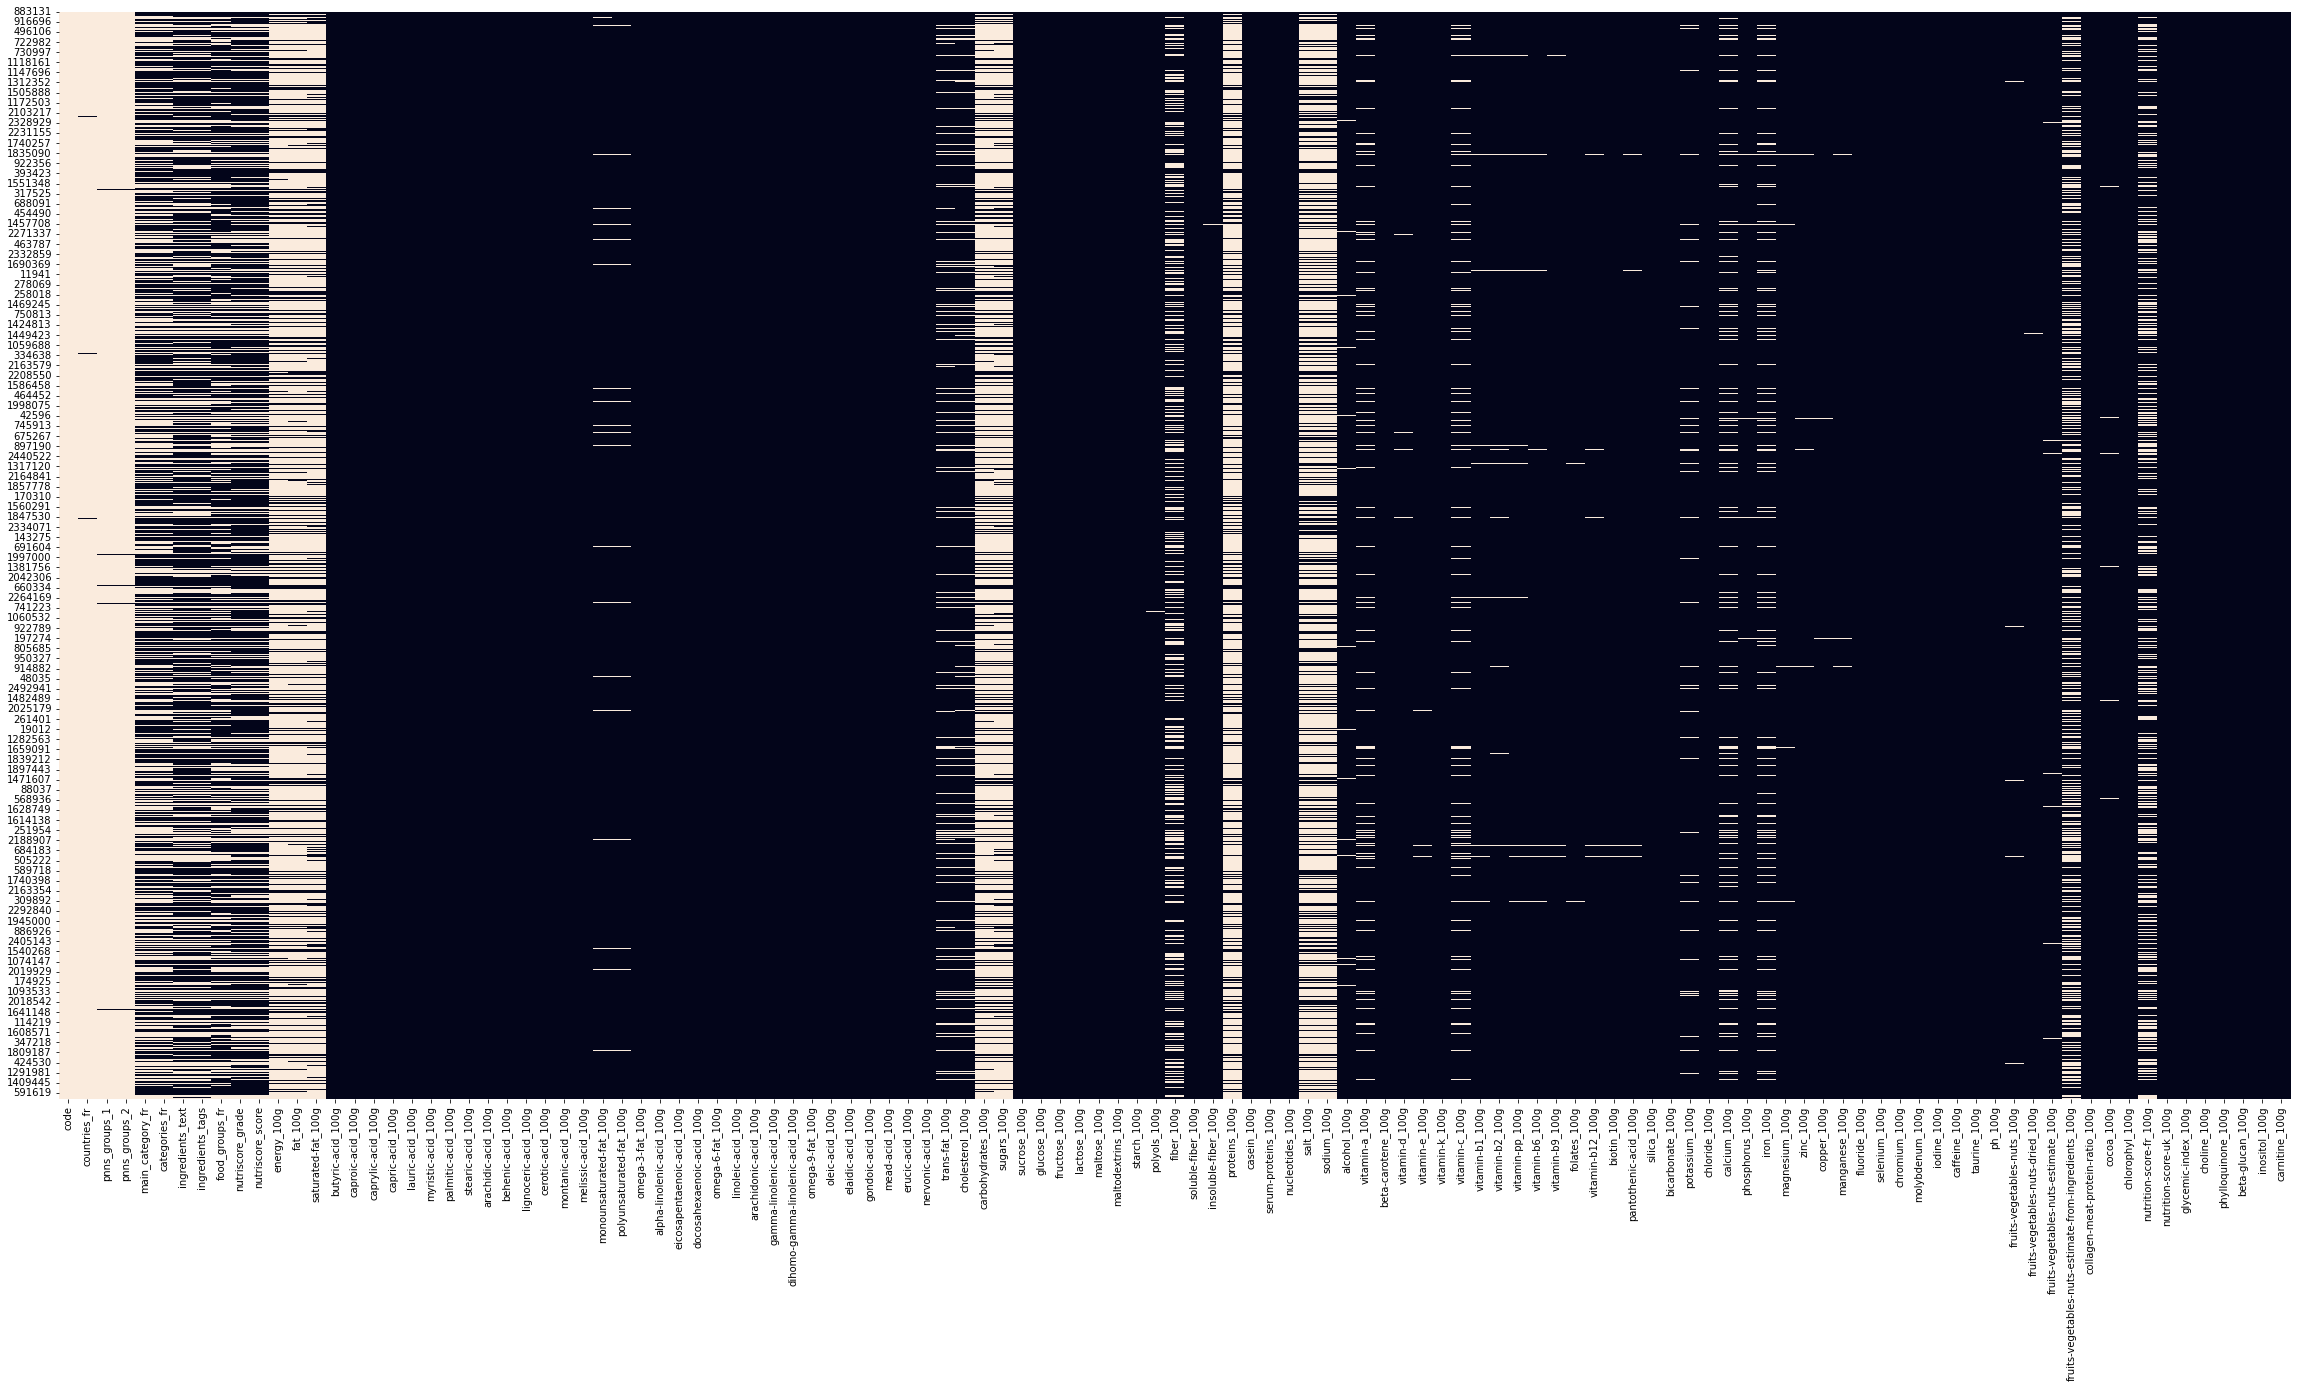

In [36]:
plt.figure(figsize=(40,20))
cmap = sns.cm.rocket_r
sns.heatmap(data_s4.sample(frac=0.01).isna(), cbar=False, cmap=cmap);

La plupart des paramètres présentent un taux de données manquantes très important.

Avant de sélectionner ces paramètres pour le traitement, je décide de supprimer tous ceux qui ont un taux de remplissage inférieur à 15%.

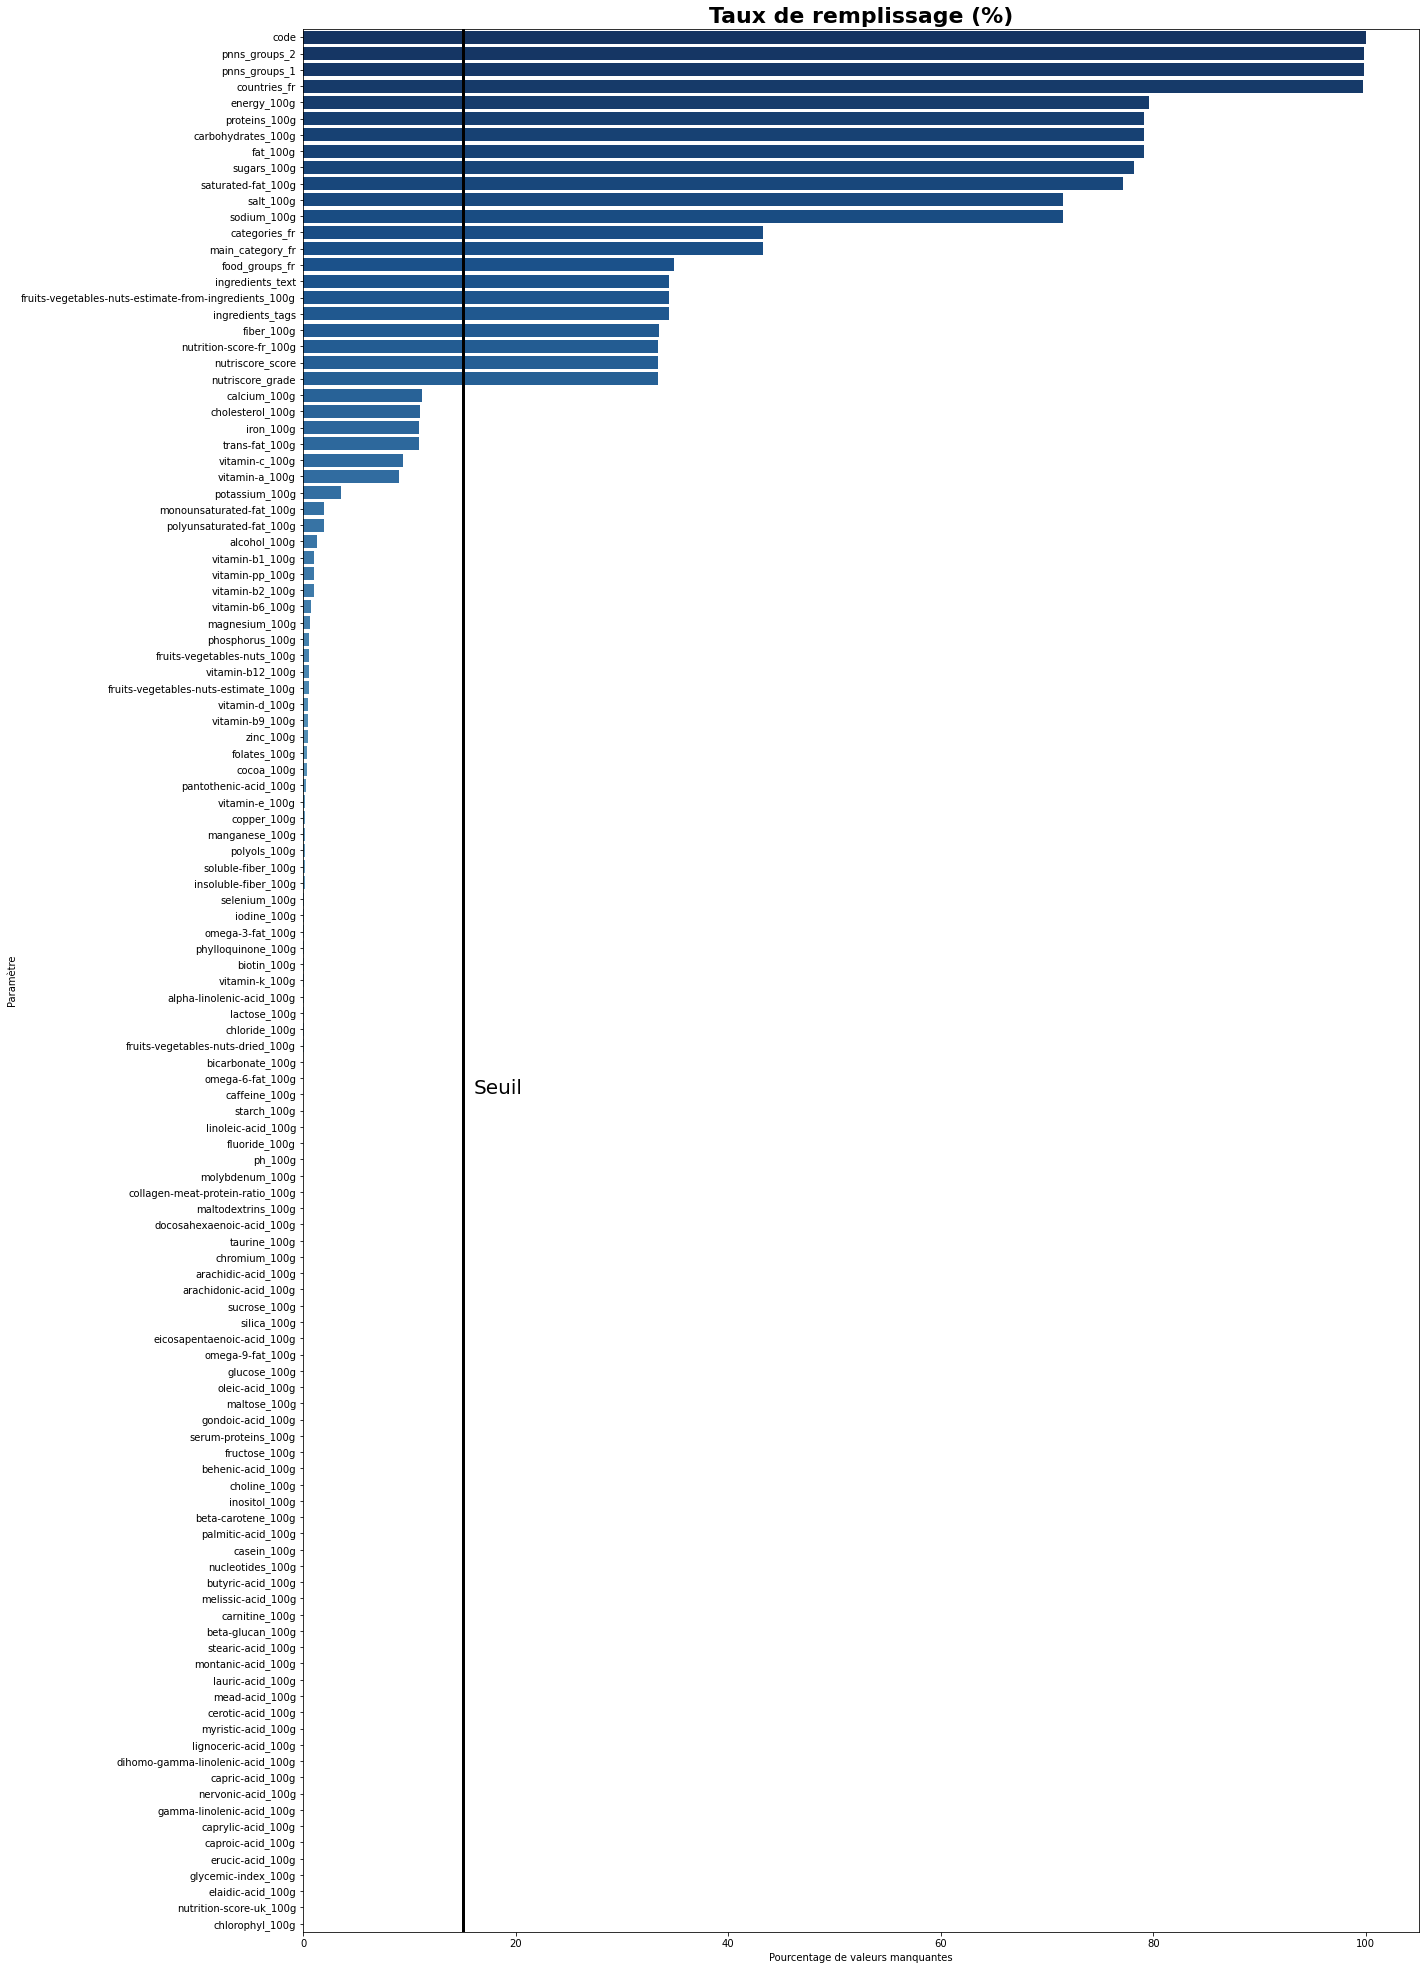

In [37]:
temp = (100-(data_s4.isnull().sum() / data_s4.shape[0])*100).reset_index()
temp.columns = ['Paramètre','Pourcentage de valeurs manquantes']
temp = temp.sort_values("Pourcentage de valeurs manquantes", ascending=False) 

seuil = 15

fig = plt.figure(figsize=(20, 35))

sns.barplot(x = 'Pourcentage de valeurs manquantes', y = 'Paramètre', data = temp, palette = "Blues_r")
plt.axvline(x = seuil, linewidth = 3, color = 'black')
plt.text(seuil+1, 65, 'Seuil', fontsize = 20)

plt.title('Taux de remplissage (%)', weight = 'bold', size = 22)

plt.show()

In [38]:
%%time

temp = ((data_s4.isnull().sum() / data_s4.shape[0])*100).reset_index()
temp.columns = ['Paramètre','Pourcentage de valeurs manquantes']

temp['Pourcentage de valeurs manquantes'] = 100-temp['Pourcentage de valeurs manquantes']
temp = temp.sort_values("Pourcentage de valeurs manquantes", ascending=False) 

temp_list = list(temp.loc[temp['Pourcentage de valeurs manquantes']>=seuil, "Paramètre"].values)
data_s4 = data_s4[temp_list]

CPU times: total: 2.14 s
Wall time: 2.15 s


In [39]:
print ("Le dataset compte {} lignes et {} colonnes.".format(data_s4.shape[0], data_s4.shape[1]))

Le dataset compte 1979815 lignes et 22 colonnes.


In [40]:
print('Données manquantes (%): ',data_s4.isna().sum().sum()/(data_s4.shape[0]*data_s4.shape[1])*100)

Données manquantes (%):  37.59566837397342


In [41]:
data_s4.head()

code pnns_groups_2 pnns_groups_1 countries_fr  \
0       00000000000000225       unknown       unknown       France   
1  0000000000000207025004       unknown       unknown    Allemagne   
4           0000000000017       unknown       unknown       France   
7      000000000004128579       unknown       unknown      Espagne   
8      000000000004622327       unknown       unknown      Espagne   

   energy_100g  proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
0          NaN            NaN                 NaN       NaN          NaN   
1        690.0            1.5                65.0       2.0        12.60   
4       1569.0            7.8                70.1       7.0        15.00   
7        812.0           18.0                 5.7      11.0         0.05   
8       3661.0           15.7                 2.6      15.1         1.00   

   saturated-fat_100g  salt_100g  sodium_100g categories_fr main_category_fr  \
0                 NaN        NaN          NaN           NaN              NaN   
1                2.00        NaN          NaN           NaN              NaN   
4                3.08        1.4         0.56           NaN              NaN   
7                3.90        NaN          NaN           NaN              NaN   
8                6.10        2.1         0.84           NaN              NaN   

  food_groups_fr ingredients_text  \
0            NaN              NaN   
1            NaN              NaN   
4            NaN              NaN   
7            NaN              NaN   
8            NaN              NaN   

   fruits-vegetables-nuts-estimate-from-ingredients_100g ingredients_tags  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
4                                                NaN                  NaN   
7                                                NaN                  NaN   
8                                                NaN                  NaN   

   fiber_100g  nutrition-score-fr_100g  nutriscore_score nutriscore_grade  
0         NaN                      NaN               NaN              NaN  
1         3.0                      NaN               NaN              NaN  
4         NaN                      NaN               NaN              NaN  
7         NaN                      NaN               NaN              NaN  
8         NaN                      NaN               NaN              NaN

## <font color="#114b98" id="section_5">5. Regroupement et nettoyage des colonnes de catégories</font>

In [42]:
data_s5 = data_s4.copy()

In [43]:
#Je sauvegarde le dataset s4 pour l'utiliser dans le notebook d'analyse
data_s4 = data_s4[data_s4['countries_fr']=='France']
data_s4 = data_s4.rename(columns={"fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruits-veg-nuts_100g"})
data_s4 = data_s4.drop(['code','ingredients_tags','countries_fr', 'pnns_groups_2', 
                        'pnns_groups_1', 'sodium_100g','categories_fr', 'main_category_fr', 
                        'food_groups_fr', 'ingredients_text' ], axis = 1)
data_s4.reset_index(inplace = True, drop = True)
data_s4.to_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_b_cleaning.csv')

In [44]:
data_s5.isna().sum()

code                                                           0
pnns_groups_2                                               4163
pnns_groups_1                                               4164
countries_fr                                                6139
energy_100g                                               403951
proteins_100g                                             412477
carbohydrates_100g                                        413931
fat_100g                                                  414129
sugars_100g                                               431825
saturated-fat_100g                                        453324
salt_100g                                                 564916
sodium_100g                                               564918
categories_fr                                            1122173
main_category_fr                                         1122173
food_groups_fr                                           1289274
ingredients_text         

Les colonnes 'salt_100g' et 'sodium_100g' sont hautement corrélées.

In [45]:
data_s5['salt_100g'].value_counts().head()

0.00    212548
0.10     49941
1.00     33588
0.01     32136
1.50     23040
Name: salt_100g, dtype: int64

In [46]:
data_s5['sodium_100g'].value_counts().head()

0.000    212550
0.040     49948
0.400     33590
0.004     32137
0.600     23031
Name: sodium_100g, dtype: int64

In [47]:
data_s5['salt_100g'].corr(data_s5['sodium_100g'])

0.999999970063612

La colonne 'salt_100g' est conservée et je supprime la colonne 'sodium_100g'.

In [48]:
data_s5.drop(['sodium_100g'], inplace = True, axis = 1)

Certaines valeurs manquantes sont indiquées par 'unknown' dans les variables 'pnns_groups_1' et 'pnns_groups_2'.
Je les remplace par NaN avec np.nan.

In [49]:
data_s5[data_s5['pnns_groups_1']=='unknown'].shape[0]

1290982

In [50]:
data_s5[data_s5['pnns_groups_2']=='unknown'].shape[0]

1290982

In [51]:
data_s5.loc[data_s5['pnns_groups_1']=='unknown','pnns_groups_1'] = np.nan

In [52]:
data_s5.loc[data_s5['pnns_groups_2']=='unknown','pnns_groups_2'] = np.nan

In [53]:
data_s5['pnns_groups_1'].value_counts(dropna=False)

NaN                        1295146
Sugary snacks               147968
Fish Meat Eggs               85066
Cereals and potatoes         84752
Milk and dairy products      84023
Fat and sauces               64050
Beverages                    63450
Composite foods              53657
Fruits and vegetables        51301
Salty snacks                 32312
Alcoholic beverages          18088
sugary-snacks                    2
Name: pnns_groups_1, dtype: int64

Je vais maintenant traiter les différentes colonnes de catégories de produits afin de n'en garder qu'une seule.

In [54]:
data_cat = data_s5.select_dtypes(include=['object'])

In [55]:
data_cat.drop(['code', 'countries_fr'], axis = 1, inplace = True)

In [56]:
data_cat.columns

Index(['pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'main_category_fr',
       'food_groups_fr', 'ingredients_text', 'ingredients_tags',
       'nutriscore_grade'],
      dtype='object')

In [57]:
for col in data_cat.columns:
    print ('main_category_fr & ' +str(col))
    print (any((data_s5['main_category_fr'].isnull()) & (~data_s5[col].isnull())), '\n')

main_category_fr & pnns_groups_2
False 

main_category_fr & pnns_groups_1
False 

main_category_fr & categories_fr
False 

main_category_fr & main_category_fr
False 

main_category_fr & food_groups_fr
False 

main_category_fr & ingredients_text
True 

main_category_fr & ingredients_tags
True 

main_category_fr & nutriscore_grade
True 



In [58]:
any((data_cat['main_category_fr'].isnull()) & (
     (~data_cat['food_groups_fr'].isnull()) | (~data_cat['categories_fr'].isnull())))

False

Je regarde la ressemblance des valeurs des deux colonnes 'main_category_fr' et 'categories_fr'.

In [59]:
data_s5[(data_s5['main_category_fr']=='Sauces') & (data_s5['categories_fr']=='en:groceries,Sauces')].head()

code         pnns_groups_2   pnns_groups_1      countries_fr  \
1037  0000309512075  Dressings and sauces  Fat and sauces        États-Unis   
1407  0000764001169  Dressings and sauces  Fat and sauces        États-Unis   
1410  0000764003033  Dressings and sauces  Fat and sauces        États-Unis   
1670  0000946701504  Dressings and sauces  Fat and sauces        États-Unis   
3014  0002410000076  Dressings and sauces  Fat and sauces  France,Allemagne   

      energy_100g  proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
1037       1046.0            0.0               43.75       0.0        34.38   
1407        130.0            0.0                7.38       0.0         6.77   
1410        192.0            0.0               11.25       0.0        10.00   
1670       1255.0           40.0               20.00      10.0         0.00   
3014          NaN            NaN                 NaN       NaN          NaN   

      saturated-fat_100g  salt_100g        categories_fr main_category_fr  \
1037                 0.0     2.9700  en:groceries,Sauces           Sauces   
1407                 0.0     0.0075  en:groceries,Sauces           Sauces   
1410                 0.0     0.0250  en:groceries,Sauces           Sauces   
1670                 0.0     5.7500  en:groceries,Sauces           Sauces   
3014                 NaN        NaN  en:groceries,Sauces           Sauces   

                                  food_groups_fr  \
1037  en:Fats and sauces,en:Dressings and sauces   
1407  en:Fats and sauces,en:Dressings and sauces   
1410  en:Fats and sauces,en:Dressings and sauces   
1670  en:Fats and sauces,en:Dressings and sauces   
3014  en:Fats and sauces,en:Dressings and sauces   

                                       ingredients_text  \
1037  Catsup, vinegar, brown sugar, apricots, enzyme...   
1407  Organic apple cider, filtered water, organic a...   
1410             Apple cider, natural flavor and spice.   
1670  Textured vegetable protein (soy flour, caramel...   
3014                                                NaN   

      fruits-vegetables-nuts-estimate-from-ingredients_100g  \
1037                                                0.0       
1407                                                0.0       
1410                                                0.0       
1670                                                0.0       
3014                                                NaN       

                                       ingredients_tags  fiber_100g  \
1037  en:catsup,en:vinegar,en:brown-sugar,en:added-s...         0.0   
1407  en:cider,en:alcohol,en:filtered-water,en:water...         0.0   
1410  en:cider,en:alcohol,en:natural-flavouring,en:f...         0.4   
1670  en:textured-vegetable-protein,en:soya-oil,en:o...        20.0   
3014                                                NaN         NaN   

      nutrition-score-fr_100g  nutriscore_score nutriscore_grade  
1037                     20.0              20.0                e  
1407                      1.0               1.0                b  
1410                      2.0               2.0                b  
1670                      8.0               8.0                c  
3014                      NaN               NaN              NaN

In [60]:
any((data_cat['main_category_fr'].isnull()) & (
     (~data_cat['pnns_groups_1'].isnull()) | (~data_cat['pnns_groups_2'].isnull())))

False

J'enlève certaines colonnes qui sont redondantes.

In [61]:
data_cat.drop(['food_groups_fr', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2'], axis = 1, inplace = True)
data_s5.drop(['food_groups_fr', 'categories_fr', 'pnns_groups_1', 'pnns_groups_2'], axis = 1, inplace = True)
data_cat.columns

Index(['main_category_fr', 'ingredients_text', 'ingredients_tags',
       'nutriscore_grade'],
      dtype='object')

In [62]:
for col in data_cat.columns:
    print (str(col)+' : '+ str(data_cat[col].isna().sum()))

main_category_fr : 1122173
ingredients_text : 1297423
ingredients_tags : 1299007
nutriscore_grade : 1318929


In [63]:
any((data_cat['main_category_fr'].isnull()) & (
     (~data_cat['ingredients_text'].isnull())))

True

In [64]:
any((data_cat['main_category_fr'].isnull()) & (
     (~data_cat['ingredients_tags'].isnull())))

True

Je décide donc de conserver uniqument la variable 'main-category_fr' (que je renomme en 'categories') sans la compléter avec les colonnes des ingrédients.

In [65]:
data_s5['categories'] = data_s5['main_category_fr']
data_s5.drop(['main_category_fr', 'ingredients_tags', 'ingredients_text'], axis = 1 , inplace = True)

Certaines valeurs de 'categories' commencent par 'en:' puis le texte est en anglais.

In [66]:
data_s5['categories'].str.startswith('en:').value_counts()

False    812592
True      45050
Name: categories, dtype: int64

In [67]:
data_s5[data_s5['categories'].str.startswith('en:', na=False)].head()

code countries_fr  energy_100g  proteins_100g  \
347    000000022524       France       3443.0            0.0   
427         0000005    Allemagne       1540.0           80.6   
529   0000012345878  Royaume-Uni          NaN            NaN   
929    000016238376      Mexique          NaN            NaN   
1036  0000309444901   États-Unis        598.0            0.0   

      carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  \
347                 0.00      91.5          0.0                12.6   
427                 0.10       5.2          0.1                 1.7   
529                  NaN       NaN          NaN                 NaN   
929                  NaN       NaN          NaN                 NaN   
1036               32.14       0.0         25.0                 NaN   

      salt_100g  fruits-vegetables-nuts-estimate-from-ingredients_100g  \
347      0.0025                                                NaN       
427      0.3000                                                0.0       
529         NaN                                                0.0       
929         NaN                                                0.0       
1036     1.6075                                                0.1       

      fiber_100g  nutrition-score-fr_100g  nutriscore_score nutriscore_grade  \
347          NaN                      6.0               6.0                c   
427          NaN                      1.0               1.0                b   
529          NaN                      NaN               NaN              NaN   
929          NaN                      NaN               NaN              NaN   
1036         NaN                      NaN               NaN              NaN   

                         categories  
347   en:huile-d-olive-vierge-extra  
427                  en:katsoubushi  
529                 en:chicken-feet  
929       en:Canned wakame seaweeds  
1036               en:salted-snacks

In [68]:
data_s5[data_s5['categories'].str.startswith('en:', na=False)]['categories'].value_counts(dropna=False).head(10)

en:salted-snacks                       6301
en:groceries                           2071
en:baking-decorations                  2027
en:raw-cured-ham                       1290
en:preparations-made-from-fish-meat    1010
en:vegetable-mixes                      973
en:seasonings                           946
en:Creamer                              935
en:labeled-cheeses                      896
en:mexican-dinner-mixes                 867
Name: categories, dtype: int64

In [69]:
data_s5['categories'].value_counts(dropna=False).head(15)

NaN                           1122173
Snacks                          27088
Biscuits                        14574
Sauces                          14080
Confiseries                     13352
Fromages                        12995
Boissons                        11315
Pains                            8899
Céréales et dérivés              7053
Yaourts                          6969
Desserts glacés                  6962
Surgelés                         6721
Boissons avec sucre ajouté       6716
Condiments                       6485
Gâteaux                          6307
Name: categories, dtype: int64

Je vais remplacer certaines valeurs (les plus présentes) commençant par 'en:' par leur équivalent en français.

In [70]:
data_s5['categories'] = data_s5['categories'].replace(
    ['en:salted-snacks','en:labeled-cheeses','en:tomme-cheese-from-mountain-or-savoy',
     'en:raw-cured-ham','en:preparations-made-from-fish-meat','en:young-gouda','en:seasoned-shredded-carrots'],
    ['Snacks','Fromages','Fromages',
     'Jambon','Poisson','Fromages','Carottes rapées'])

In [71]:
data_s5 = data_s5[~(data_s5['categories'].str.startswith('en:', na=False))]

In [72]:
data_s5 = data_s5[~(data_s5['categories'].str.startswith('es:', na=False))]

In [73]:
data_s5 = data_s5[~(data_s5['categories'].str.startswith('de:', na=False))]

In [74]:
data_s5['categories'] = data_s5['categories'].str.replace('-', ' ')
data_s5['categories'] = data_s5['categories'].str.replace(': ', ' ')
data_s5['categories'] = data_s5['categories'].str.replace(',', '')

In [75]:
data_s5.head()

code countries_fr  energy_100g  proteins_100g  \
0       00000000000000225       France          NaN            NaN   
1  0000000000000207025004    Allemagne        690.0            1.5   
4           0000000000017       France       1569.0            7.8   
7      000000000004128579      Espagne        812.0           18.0   
8      000000000004622327      Espagne       3661.0           15.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                 NaN       NaN          NaN                 NaN        NaN   
1                65.0       2.0        12.60                2.00        NaN   
4                70.1       7.0        15.00                3.08        1.4   
7                 5.7      11.0         0.05                3.90        NaN   
8                 2.6      15.1         1.00                6.10        2.1   

   fruits-vegetables-nuts-estimate-from-ingredients_100g  fiber_100g  \
0                                                NaN             NaN   
1                                                NaN             3.0   
4                                                NaN             NaN   
7                                                NaN             NaN   
8                                                NaN             NaN   

   nutrition-score-fr_100g  nutriscore_score nutriscore_grade categories  
0                      NaN               NaN              NaN        NaN  
1                      NaN               NaN              NaN        NaN  
4                      NaN               NaN              NaN        NaN  
7                      NaN               NaN              NaN        NaN  
8                      NaN               NaN              NaN        NaN

In [76]:
data_s5['categories'].value_counts(dropna=False).head(50)

NaN                                        1122173
Snacks                                       33389
Biscuits                                     14574
Fromages                                     14094
Sauces                                       14080
Confiseries                                  13352
Boissons                                     11315
Pains                                         8899
Céréales et dérivés                           7053
Yaourts                                       6969
Desserts glacés                               6962
Surgelés                                      6721
Boissons avec sucre ajouté                    6716
Condiments                                    6485
Gâteaux                                       6307
Pâtes alimentaires                            5726
Boissons à base de végétaux                   5280
Confiseries chocolatées                       5056
Charcuteries                                  4830
Chocolats noirs                

In [77]:
data_s5.head()

code countries_fr  energy_100g  proteins_100g  \
0       00000000000000225       France          NaN            NaN   
1  0000000000000207025004    Allemagne        690.0            1.5   
4           0000000000017       France       1569.0            7.8   
7      000000000004128579      Espagne        812.0           18.0   
8      000000000004622327      Espagne       3661.0           15.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                 NaN       NaN          NaN                 NaN        NaN   
1                65.0       2.0        12.60                2.00        NaN   
4                70.1       7.0        15.00                3.08        1.4   
7                 5.7      11.0         0.05                3.90        NaN   
8                 2.6      15.1         1.00                6.10        2.1   

   fruits-vegetables-nuts-estimate-from-ingredients_100g  fiber_100g  \
0                                                NaN             NaN   
1                                                NaN             3.0   
4                                                NaN             NaN   
7                                                NaN             NaN   
8                                                NaN             NaN   

   nutrition-score-fr_100g  nutriscore_score nutriscore_grade categories  
0                      NaN               NaN              NaN        NaN  
1                      NaN               NaN              NaN        NaN  
4                      NaN               NaN              NaN        NaN  
7                      NaN               NaN              NaN        NaN  
8                      NaN               NaN              NaN        NaN

Il me reste à nettoyer la variable 'countries_fr'.

In [78]:
data_s5['countries_fr'].value_counts()

France                                                     649740
États-Unis                                                 392111
Espagne                                                    184861
Italie                                                     117808
Allemagne                                                   98688
                                                            ...  
Belgique,Pays-Bas,Pologne                                       1
Slovaquie,Suisse                                                1
République tchèque,Grèce,Hongrie,Irlande,Roumanie,Suède         1
Autriche,Grèce,Roumanie                                         1
Bulgarie,Chypre,République tchèque,Grèce                        1
Name: countries_fr, Length: 4295, dtype: int64

Certaines observations comportent plusieurs pays. Afin d'utiliser plus tard cette application en France, je souhaite remplacer par 'France' les observations où plusieurs pays sont mentionnés.

In [79]:
data_s5['countries_fr'].str.contains('France').value_counts()

False    1211079
True      715615
Name: countries_fr, dtype: int64

In [80]:
data_s5['countries_fr'].str.contains('France,').value_counts()

False    1872655
True       54039
Name: countries_fr, dtype: int64

In [81]:
data_s5['countries_fr'].str.contains(',France').value_counts()

False    1910911
True       15783
Name: countries_fr, dtype: int64

In [82]:
def contains_France(col):
    dict_out = dict()
    for idx, val in col.items():
        text = str(val)
        if text[0] == 'n' and text [1]=='a' and text[2] == 'n':
            dict_out[idx] = np.nan
        elif ('France,' in text) or (',France' in text) or ('France' in text):
            dict_out[idx] = 'France'
        else:
            dict_out[idx] = text
    
    df_out = pd.DataFrame([dict_out]).T
    df_out.columns = ['firstwords']

    return df_out 

In [83]:
data_s5['countries'] = contains_France(data_s5['countries_fr'])

In [84]:
data_s5['countries'].value_counts()

France                                                            715615
États-Unis                                                        392111
Espagne                                                           184861
Italie                                                            117808
Allemagne                                                          98688
                                                                   ...  
Australie,Allemagne,Japon                                              1
Azerbaïdjan,Géorgie,Kazakhstan,Kirghizistan,Russie,Ouzbékistan         1
Russie,Tadjikistan                                                     1
Bulgarie,Japon                                                         1
Bulgarie,Chypre,République tchèque,Grèce                               1
Name: countries, Length: 2388, dtype: int64

Je réorganise les colonnes.

In [85]:
cols_cat = ['code'] + ['countries'] + ['categories']
cols_num = [col for col in data_s5 if col not in cols_cat]
cols = cols_cat + cols_num

In [86]:
data_s5 = data_s5[cols]

In [87]:
data_s5.drop(['countries_fr'], axis = 1 , inplace = True)

Je renomme une des variables afin qu'elle prenne moins de place dans les graphiques qui suivront.

In [88]:
data_s5 = data_s5.rename(columns={"fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruits-veg-nuts_100g"})

Lors de la dernière semaine avant la soutenance, mon tuteur m'a proposé d'ajouter sur le notebook d'analyse une comparaison des nutriscores pour les produits avec et sans viandes/poissons.

Les colonnes 'nutriscore_grade', 'nutriscore_score', 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' qui étaient auparavant supprimées vont être étudiées maintenant.

In [89]:
data_s5[['nutriscore_grade', 'nutriscore_score', 'nutrition-score-fr_100g']]

nutriscore_grade  nutriscore_score  nutrition-score-fr_100g
0                    NaN               NaN                      NaN
1                    NaN               NaN                      NaN
4                    NaN               NaN                      NaN
7                    NaN               NaN                      NaN
8                    NaN               NaN                      NaN
...                  ...               ...                      ...
2519844              NaN               NaN                      NaN
2519845              NaN               NaN                      NaN
2519846              NaN               NaN                      NaN
2519847              NaN               NaN                      NaN
2519848                e              25.0                     25.0

[1932601 rows x 3 columns]

Il semblerait que les 3 premières colonnes sont complétées entre elles.

In [90]:
any((data_s5['nutrition-score-fr_100g'].isnull()) & (((~data_s5['nutriscore_score'].isnull())) | 
                                                     ((~data_s5['nutriscore_grade'].isnull()))))

False

In [91]:
data_s5['nutriscore_grade'].isnull().sum()

1306512

In [92]:
data_s5['nutriscore_score'].isnull().sum()

1306512

In [93]:
data_s5['nutrition-score-fr_100g'].isnull().sum()

1306510

In [94]:
data_s5[(data_s5['nutrition-score-fr_100g'] != data_s5['nutriscore_score']) & (~data_s5['nutriscore_score'].isnull())]

Empty DataFrame
Columns: [code, countries, categories, energy_100g, proteins_100g, carbohydrates_100g, fat_100g, sugars_100g, saturated-fat_100g, salt_100g, fruits-veg-nuts_100g, fiber_100g, nutrition-score-fr_100g, nutriscore_score, nutriscore_grade]
Index: []

Je ne peux compléter une colonne par une autre. Je vais garder pour la suite les colonnes 'nutriscore_score' et 'nutriscore_grade'.

In [95]:
data_s5.drop(['nutrition-score-fr_100g'], axis = 1 , inplace = True)

In [96]:
data_s5.head()

code  countries categories  energy_100g  proteins_100g  \
0       00000000000000225     France        NaN          NaN            NaN   
1  0000000000000207025004  Allemagne        NaN        690.0            1.5   
4           0000000000017     France        NaN       1569.0            7.8   
7      000000000004128579    Espagne        NaN        812.0           18.0   
8      000000000004622327    Espagne        NaN       3661.0           15.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                 NaN       NaN          NaN                 NaN        NaN   
1                65.0       2.0        12.60                2.00        NaN   
4                70.1       7.0        15.00                3.08        1.4   
7                 5.7      11.0         0.05                3.90        NaN   
8                 2.6      15.1         1.00                6.10        2.1   

   fruits-veg-nuts_100g  fiber_100g  nutriscore_score nutriscore_grade  
0                   NaN         NaN               NaN              NaN  
1                   NaN         3.0               NaN              NaN  
4                   NaN         NaN               NaN              NaN  
7                   NaN         NaN               NaN              NaN  
8                   NaN         NaN               NaN              NaN

In [97]:
print('Données manquantes (%) : ', data_s5.isna().sum().sum()/(data_s5.shape[0]*data_s5.shape[1])*100)

Données manquantes (%) :  34.53900062292068


In [98]:
print ("Le dataset compte maintenant {} lignes et {} colonnes.".format(data_s5.shape[0], data_s5.shape[1]))

Le dataset compte maintenant 1932601 lignes et 14 colonnes.


## <font color="#114b98" id="section_6">6. Suppression des valeurs aberrantes</font>

In [99]:
data_s6 = data_s5.copy()

J'enlève pour le moment ces deux colonnes que je traiterai plus tard.

In [100]:
data_nutri = data_s6[['nutriscore_score', 'nutriscore_grade']]

In [101]:
data_s6.drop(['nutriscore_score', 'nutriscore_grade'], axis = 1 , inplace = True)

Je souhaite donc remplacer supprimer les valeurs négatives des variables finissant par '_100g' par np.NaN.

In [102]:
(data_s6.loc[:,data_s6.columns.str.endswith('_100g')]<0).sum()

energy_100g             1
proteins_100g           8
carbohydrates_100g      0
fat_100g                0
sugars_100g             2
saturated-fat_100g      0
salt_100g               0
fruits-veg-nuts_100g    0
fiber_100g              9
dtype: int64

In [103]:
data_s6.head()

code  countries categories  energy_100g  proteins_100g  \
0       00000000000000225     France        NaN          NaN            NaN   
1  0000000000000207025004  Allemagne        NaN        690.0            1.5   
4           0000000000017     France        NaN       1569.0            7.8   
7      000000000004128579    Espagne        NaN        812.0           18.0   
8      000000000004622327    Espagne        NaN       3661.0           15.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                 NaN       NaN          NaN                 NaN        NaN   
1                65.0       2.0        12.60                2.00        NaN   
4                70.1       7.0        15.00                3.08        1.4   
7                 5.7      11.0         0.05                3.90        NaN   
8                 2.6      15.1         1.00                6.10        2.1   

   fruits-veg-nuts_100g  fiber_100g  
0                   NaN         NaN  
1                   NaN         3.0  
4                   NaN         NaN  
7                   NaN         NaN  
8                   NaN         NaN

In [104]:
mask = (data_s6.select_dtypes(include=['float64']) < 0)

In [105]:
data_s6.select_dtypes(include=['float64']).where(~mask, other = np.nan, inplace = True)

In [106]:
(data_s6.loc[:,data_s6.columns.str.endswith('_100g')]<0).sum()

energy_100g             0
proteins_100g           0
carbohydrates_100g      0
fat_100g                0
sugars_100g             0
saturated-fat_100g      0
salt_100g               0
fruits-veg-nuts_100g    0
fiber_100g              0
dtype: int64

Voici la distribution de la variable 'energy_100g'.

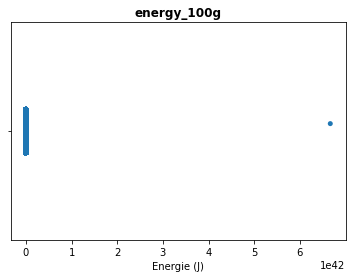

In [107]:
sns.stripplot(data = data_s6, x="energy_100g")
plt.title('energy_100g', weight = 'bold')
plt.xlabel('Energie (J)');

Une valeur semble totalement en dehors des limites possibles (ici 1e42 Joules pour 100g).

Une recherche sur internet m'indique que la valeur de 9770 kJ / 100g est la plus haute et correspond à du caramel (https://informationsnutritionnelles.fr/energie-kilojoules).
Je fixe donc la limite supérieur à 9770000J pour 100g. 

In [108]:
(data_s6['energy_100g']>9770000).sum()

6

In [109]:
data_s6['energy_100g']>9770000

0          False
1          False
4          False
7          False
8          False
           ...  
2519844    False
2519845    False
2519846    False
2519847    False
2519848    False
Name: energy_100g, Length: 1932601, dtype: bool

In [110]:
data_s6['energy_100g'].where(~(data_s6['energy_100g']>9770000), other = np.nan, inplace = True)

In [111]:
(data_s6['energy_100g']>9770000).sum()

0

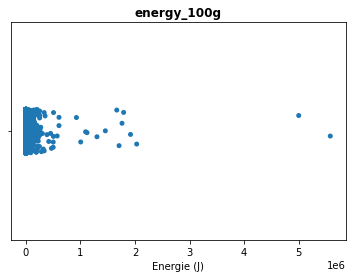

In [112]:
sns.stripplot(data = data_s6, x="energy_100g")
plt.title('energy_100g', weight = 'bold')
plt.xlabel('Energie (J)');

Je décide de supprimer aussi les 15 observations (>1e5) non pertinentes à la vue de leurs contenus.

In [113]:
(data_s6['energy_100g']>100000).sum()

97

Après étude dans le notebook d'analyse, je décide de remplacer par np.nan les 93 observations qui ont une énergie supérieure à 12000 Joules.

In [114]:
(data_s6['energy_100g']>12000).sum()

450

In [115]:
data_s6['energy_100g'].where(~(data_s6['energy_100g']>12000), other = np.nan, inplace = True)

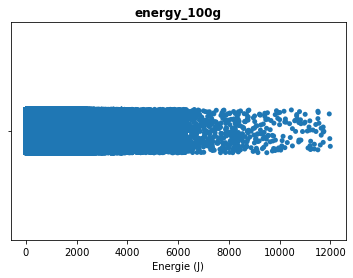

In [116]:
sns.stripplot(data = data_s6, x="energy_100g")
plt.title('energy_100g', weight = 'bold')
plt.xlabel('Energie (J)');

Je remplace par des NaN les valeurs supérieures à 100 dans les autres colonnes numériques.

Exemple : distribution de la variable 'salt_100g'.

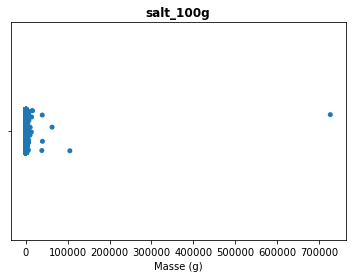

In [117]:
sns.stripplot(data = data_s6, x="salt_100g")
plt.title('salt_100g', weight = 'bold')
plt.xlabel('Masse (g)');

Je sélectionne toutes les colonnes de type 'float64' sauf celle de l'énergie.

In [118]:
data_numeric = data_s6.select_dtypes(include=['float64'])

In [119]:
data_numeric.drop(['energy_100g'], axis = 1, inplace = True)

In [120]:
mask = (data_numeric.loc[:,data_numeric.columns]>100)

In [121]:
(data_numeric.loc[:,data_numeric.columns]>100).sum()

proteins_100g            276
carbohydrates_100g       521
fat_100g                 398
sugars_100g              207
saturated-fat_100g       150
salt_100g               1184
fruits-veg-nuts_100g     972
fiber_100g               166
dtype: int64

In [122]:
data_numeric.where(~mask, other = np.nan, inplace = True)

In [123]:
data_s6.loc[:,'proteins_100g':'fiber_100g'] = data_numeric

In [124]:
data_numeric.head()

proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
0            NaN                 NaN       NaN          NaN   
1            1.5                65.0       2.0        12.60   
4            7.8                70.1       7.0        15.00   
7           18.0                 5.7      11.0         0.05   
8           15.7                 2.6      15.1         1.00   

   saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  
0                 NaN        NaN                   NaN         NaN  
1                2.00        NaN                   NaN         3.0  
4                3.08        1.4                   NaN         NaN  
7                3.90        NaN                   NaN         NaN  
8                6.10        2.1                   NaN         NaN

In [125]:
(data_numeric.loc[:,data_numeric.columns]>100).sum()

proteins_100g           0
carbohydrates_100g      0
fat_100g                0
sugars_100g             0
saturated-fat_100g      0
salt_100g               0
fruits-veg-nuts_100g    0
fiber_100g              0
dtype: int64

Voici la nouvelle distribution de la variable 'salt_100g'.

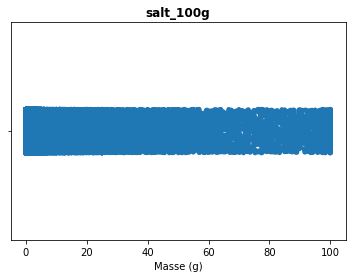

In [126]:
sns.stripplot(data = data_s6, x="salt_100g")
plt.title('salt_100g', weight = 'bold')
plt.xlabel('Masse (g)');

Les valeurs sont maintenant bien comprises entre 0 et 100.

Il y a tellement de valeurs nulles ou comprises entre 0 et 5 que les boxplots ne sont pas très exploitables.

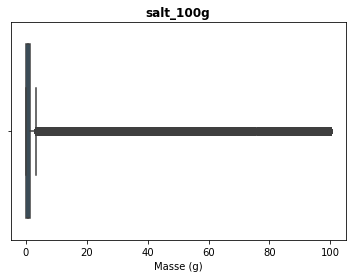

In [127]:
sns.boxplot(data = data_s6, x="salt_100g")
plt.title('salt_100g', weight = 'bold')
plt.xlabel('Masse (g)');

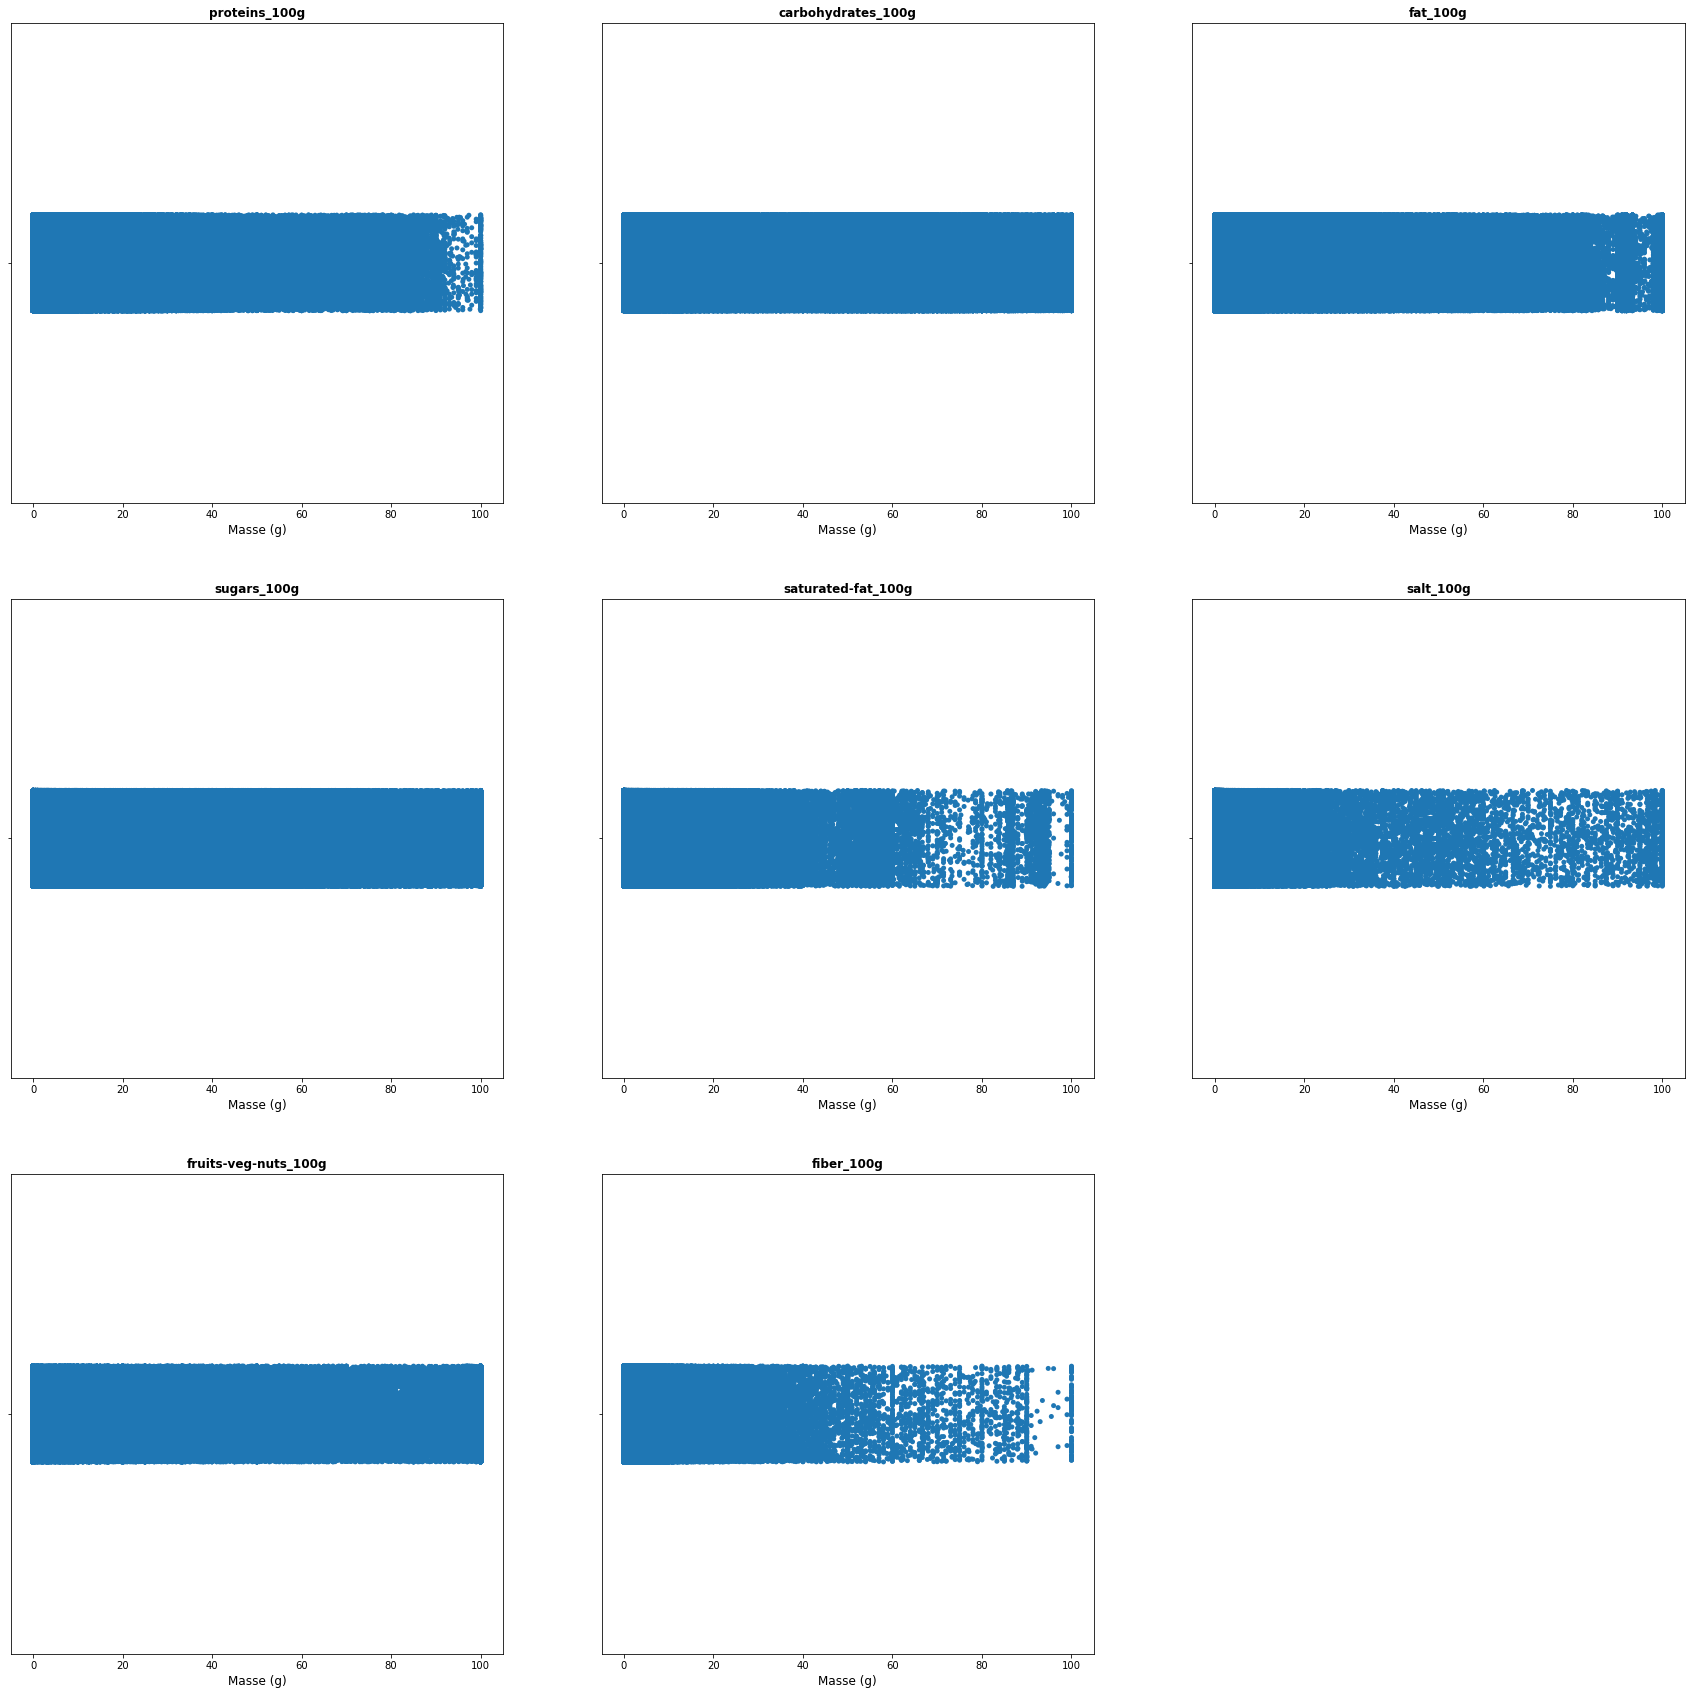

In [128]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
idx = 1

for col in data_numeric.columns:
    ax = fig.add_subplot(3, 3, idx)
    ax.set_title(col, weight = 'bold')
    sns.stripplot(data = data_numeric, x=col, ax=ax)
    ax.set_xlabel('Masse (g)', size = 12)
    idx = idx + 1

plt.show()

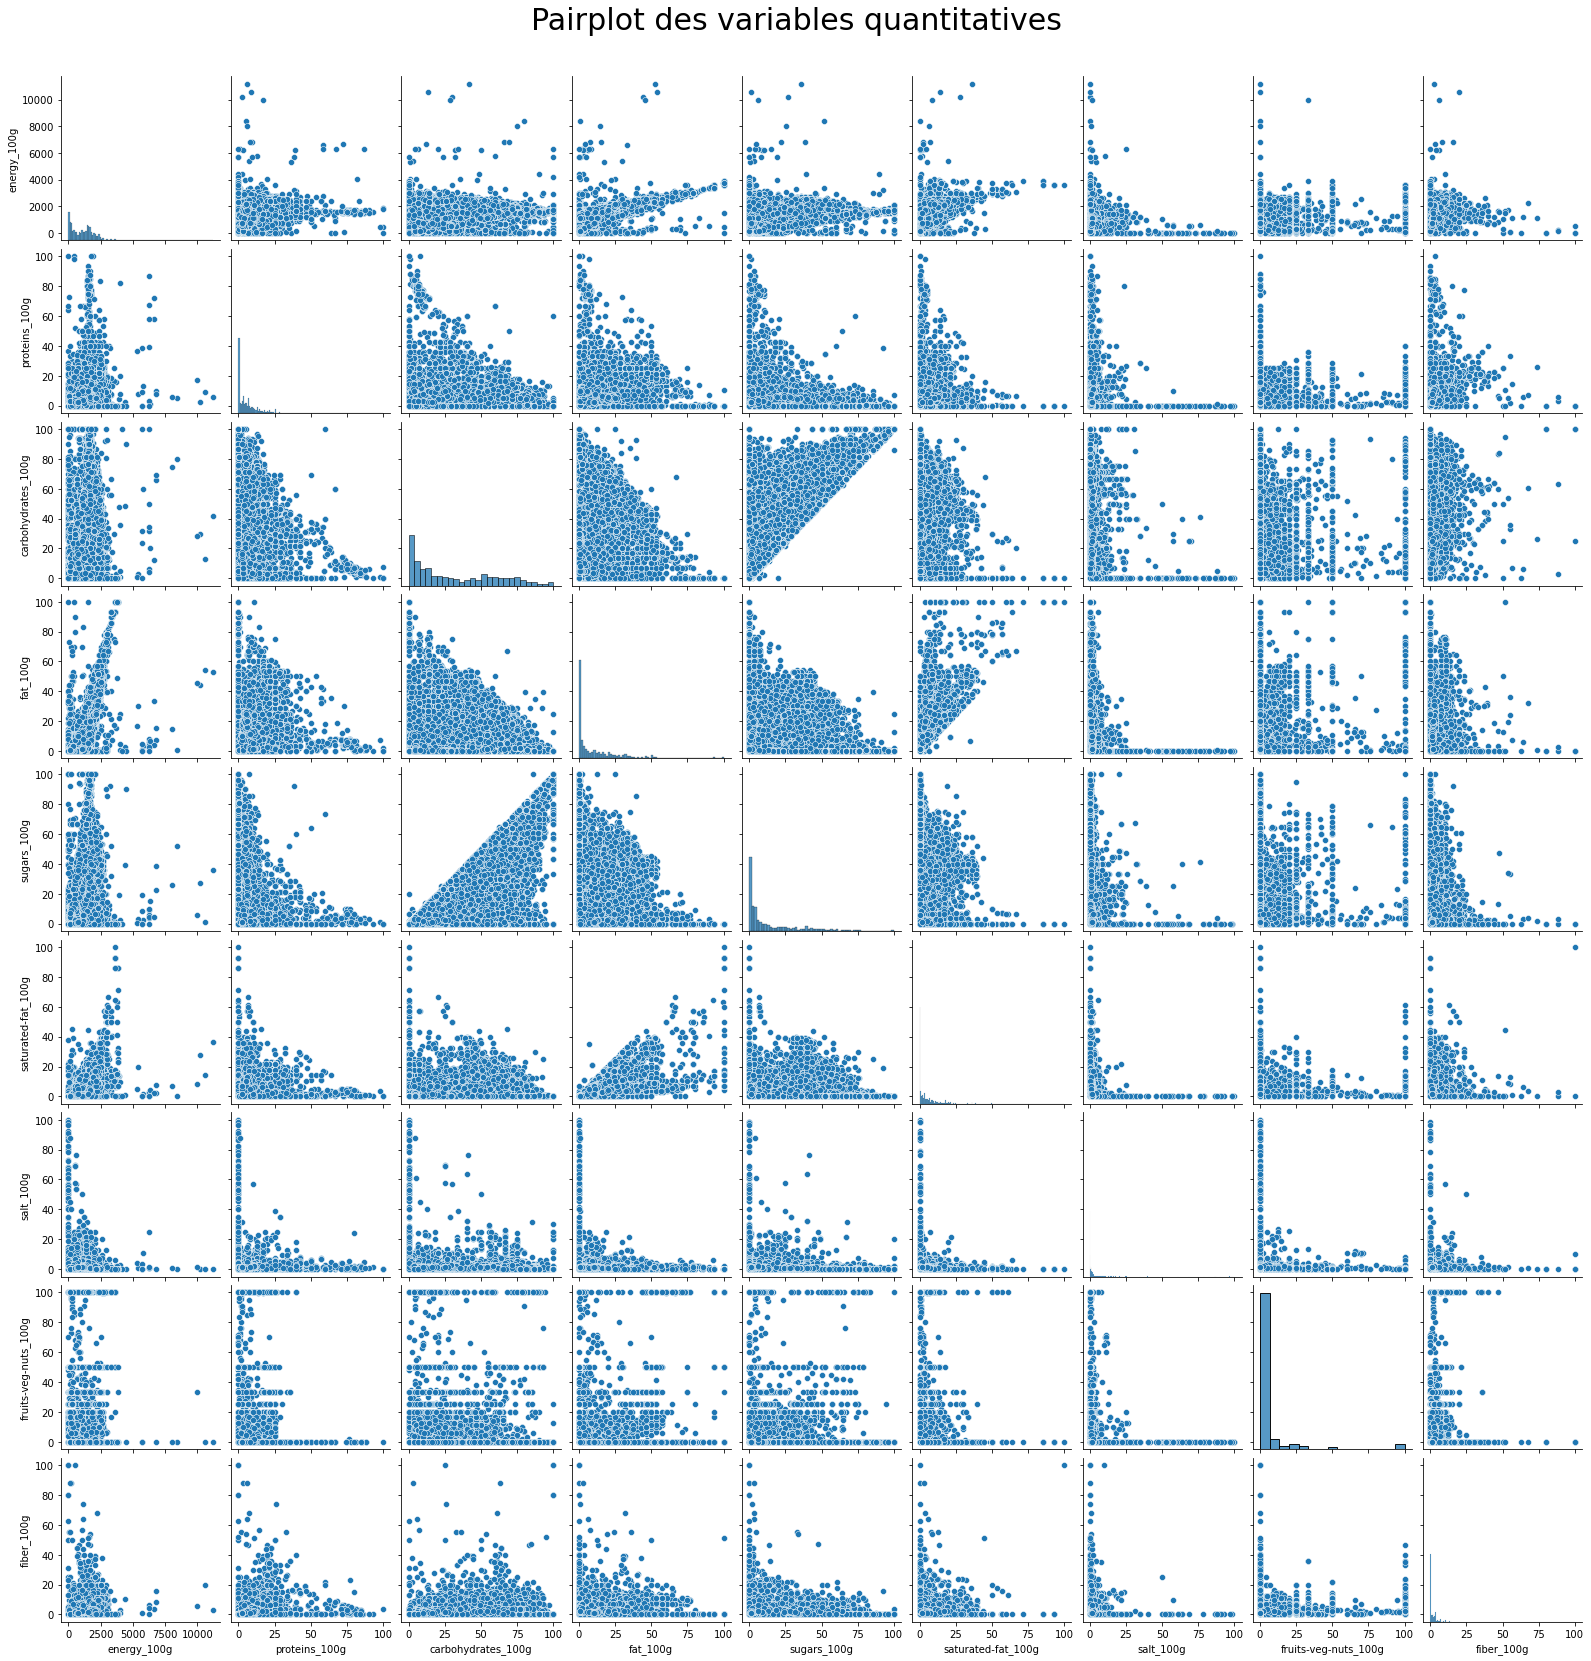

In [129]:
data_select_pairplot = data_s6[:20000]

g = sns.pairplot(data_select_pairplot)
g.fig.suptitle("Pairplot des variables quantitatives", y=1.03, size = 30);

Certains produits ont une valeur de 'saturated-fat_100g' supérieure à 'fat_100g ;  et de même pour des produits qui ont davantage de 'carbohydrates_100g' que de 'sugar_100g'. Ceci semble abérrant et je remplace par np.nan les valeurs de 'saturated-fat_100g' et 'sugars_100g' des observations pour lesquelles ceci est le cas.

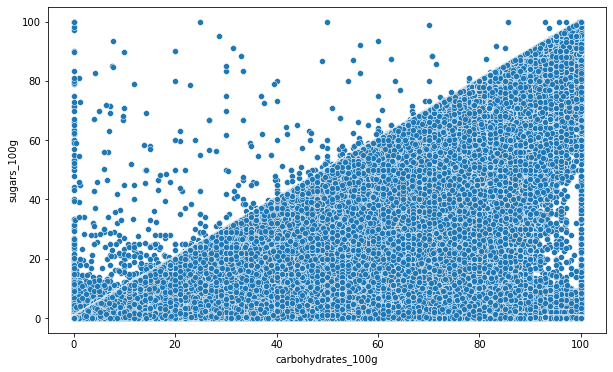

In [130]:
plt.figure(figsize=(10,6));
sns.scatterplot(x='carbohydrates_100g', y='sugars_100g', data=data_s6);

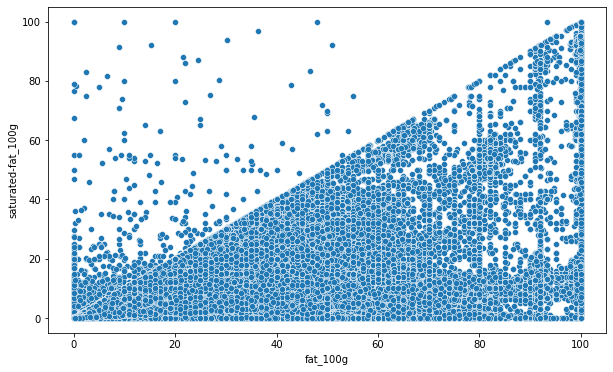

In [131]:
plt.figure(figsize=(10,6));
sns.scatterplot(x='fat_100g', y='saturated-fat_100g', data=data_s6);

In [132]:
(data_s6['saturated-fat_100g']>data_s6['fat_100g']).sum()

1242

In [133]:
(data_s6['sugars_100g']>data_s6['carbohydrates_100g']).sum()

2657

In [134]:
data_s6.loc[(data_s6['saturated-fat_100g']>data_s6['fat_100g']),'saturated-fat_100g'] = np.nan

In [135]:
data_s6.loc[(data_s6['sugars_100g']>data_s6['carbohydrates_100g']),'sugars_100g'] = np.nan

In [136]:
data_s6.head()

code  countries categories  energy_100g  proteins_100g  \
0       00000000000000225     France        NaN          NaN            NaN   
1  0000000000000207025004  Allemagne        NaN        690.0            1.5   
4           0000000000017     France        NaN       1569.0            7.8   
7      000000000004128579    Espagne        NaN        812.0           18.0   
8      000000000004622327    Espagne        NaN       3661.0           15.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                 NaN       NaN          NaN                 NaN        NaN   
1                65.0       2.0        12.60                2.00        NaN   
4                70.1       7.0        15.00                3.08        1.4   
7                 5.7      11.0         0.05                3.90        NaN   
8                 2.6      15.1         1.00                6.10        2.1   

   fruits-veg-nuts_100g  fiber_100g  
0                   NaN         NaN  
1                   NaN         3.0  
4                   NaN         NaN  
7                   NaN         NaN  
8                   NaN         NaN

Je décide de supprimer les observations qui ont 6 données numériques manquantes ou plus sur les 9 possibles.

In [137]:
(data_s6.select_dtypes(include=['float64']).isna().sum(axis = 1) >=6).sum()

403028

In [138]:
data_s6['too_many_missing_values'] = data_s6.select_dtypes(include=['float64']).isna().sum(axis = 1) >=6

In [139]:
data_s6 = data_s6[data_s6['too_many_missing_values']==False]
data_s6.drop(['too_many_missing_values'], axis = 1, inplace = True)

Je reviens maintenant sur le nettoyage du jeu de données des nutriscores.

In [140]:
data_nutri

nutriscore_score nutriscore_grade
0                     NaN              NaN
1                     NaN              NaN
4                     NaN              NaN
7                     NaN              NaN
8                     NaN              NaN
...                   ...              ...
2519844               NaN              NaN
2519845               NaN              NaN
2519846               NaN              NaN
2519847               NaN              NaN
2519848              25.0                e

[1932601 rows x 2 columns]

Text(0.5, 1.0, 'nutriscore_score')

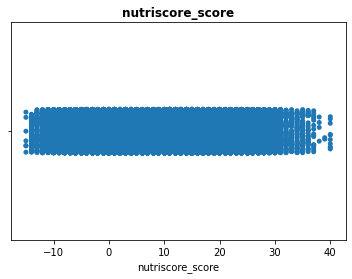

In [141]:
sns.stripplot(data = data_nutri, x="nutriscore_score")
plt.title('nutriscore_score', weight = 'bold')

In [142]:
(data_nutri['nutriscore_score']<-15).sum()

0

In [143]:
(data_nutri['nutriscore_score']>40).sum()

0

Aucune donnée est en dehors de l'intervalle [-15;40].

In [144]:
data_s6['nutriscore_score'] = data_nutri['nutriscore_score']
data_s6['nutriscore_grade'] = data_nutri['nutriscore_grade']

In [145]:
print('Données manquantes (%) : ', data_s6.isna().sum().sum()/(data_s6.shape[0]*data_s6.shape[1])*100)

Données manquantes (%) :  22.173027561099918


In [146]:
print ("Le dataset compte maintenant {} lignes et {} colonnes.".format(data_s6.shape[0], data_s6.shape[1]))

Le dataset compte maintenant 1529573 lignes et 14 colonnes.


## <font color="#114b98" id="section_7">7. Imputation</font>

In [147]:
data_s7 = data_s6.copy()

In [148]:
#Je sauvegarde le dataset s6 pour l'utiliser dans le notebook d'analyse
data_s6 = data_s6[data_s6['countries']=='France']
data_s6 = data_s6.drop(['code','countries','categories','nutriscore_score','nutriscore_grade'], axis = 1)
data_s6.reset_index(inplace = True, drop = True)
data_s6.to_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_b_imputation.csv')

In [149]:
data_s7_num = data_s7.select_dtypes(include=['float64'])

In [150]:
data_s7['categories'].value_counts().head(25)

Snacks                          33135
Biscuits                        14008
Sauces                          13705
Fromages                        13435
Confiseries                     13064
Boissons                         8746
Pains                            8294
Desserts glacés                  6913
Céréales et dérivés              6849
Surgelés                         6675
Yaourts                          6643
Boissons avec sucre ajouté       6457
Gâteaux                          6069
Condiments                       5987
Pâtes alimentaires               5534
Boissons à base de végétaux      5225
Confiseries chocolatées          4993
Charcuteries                     4603
Chocolats noirs                  4224
Sodas                            4059
Trempettes                       3974
Huiles d'olive vierges extra     3646
Saucisses                        3466
Bonbons                          3240
Soupes                           3149
Name: categories, dtype: int64

Je vais remplacer par la médiane les données manquantes des observations qui sont dans des mêmes catégories.

In [151]:
data_s7[data_s7['categories']=='Snacks']

code    countries categories  energy_100g  \
1036          0000309444901   États-Unis     Snacks        598.0   
1087          0000417011002   États-Unis     Snacks       2209.0   
1265               00006163   États-Unis     Snacks         75.0   
1434          0000790100027   États-Unis     Snacks       1343.0   
1478          0000790400004   États-Unis     Snacks       1494.0   
...                     ...          ...        ...          ...   
2508688       9556345317484   La Réunion     Snacks       2063.0   
2510000            96202081  Royaume-Uni     Snacks        732.0   
2512733       9789999912341       Italie     Snacks          0.0   
2513010           981243429       Italie     Snacks       1857.0   
2513951  990530101070743391       France     Snacks       2188.0   

         proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
1036              0.00               32.14       0.0        25.00   
1087              8.00               60.00      28.0        49.60   
1265              0.00                3.57       0.0         0.00   
1434              0.00               78.57       0.0        64.29   
1478              3.57               92.86       0.0        75.00   
...                ...                 ...       ...          ...   
2508688           5.20               66.40      23.0        10.80   
2510000           0.00               73.00       0.0         0.00   
2512733           0.00               12.00       0.0         8.00   
2513010          15.00               41.20      22.6        21.10   
2513951          13.00               49.00      30.0         0.90   

         saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  \
1036                    NaN     1.6075                   0.1         NaN   
1087                   18.4     0.4000                   0.0         2.0   
1265                    0.0     3.0350                  10.0         3.6   
1434                    NaN     0.0900                  10.0         7.1   
1478                    0.0     0.0000                   0.0        10.7   
...                     ...        ...                   ...         ...   
2508688                10.7     2.6000                   NaN         NaN   
2510000                 0.0     0.0000                   NaN         0.7   
2512733                 0.0        NaN                   NaN         0.0   
2513010                 2.6     0.0370                   0.0        10.5   
2513951                21.0     1.9000                   NaN         2.6   

         nutriscore_score nutriscore_grade  
1036                  NaN              NaN  
1087                 25.0                e  
1265                  7.0                c  
1434                  NaN              NaN  
1478                  9.0                c  
...                   ...              ...  
2508688              28.0                e  
2510000               2.0                b  
2512733               NaN              NaN  
2513010               6.0                c  
2513951              22.0                e  

[33135 rows x 14 columns]

In [152]:
data_s7_num = data_s7.select_dtypes(include=['float64'])

In [153]:
data_s7_num[data_s7['categories']=='Snacks'].median()

energy_100g             1824.0000
proteins_100g              7.1400
carbohydrates_100g        46.4300
fat_100g                  20.0000
sugars_100g                7.1400
saturated-fat_100g         3.5700
salt_100g                  0.9825
fruits-veg-nuts_100g       0.0000
fiber_100g                 3.6000
nutriscore_score          12.0000
dtype: float64

In [154]:
temp = data_s7['categories'].value_counts().to_frame()

In [155]:
temp['categories'].index[0:10]

Index(['Snacks', 'Biscuits', 'Sauces', 'Fromages', 'Confiseries', 'Boissons',
       'Pains', 'Desserts glacés', 'Céréales et dérivés', 'Surgelés'],
      dtype='object')

Je fais cette imputation uniquement pour les catégories qui ont au minimum 500 observations.

In [156]:
temp[temp['categories']>500]

categories
Snacks                    33135
Biscuits                  14008
Sauces                    13705
Fromages                  13435
Confiseries               13064
...                         ...
Aliments pour bébé          505
Porc                        505
Mueslis au chocolat         501
Nuggets de poulet           501
Pains grillés               501

[220 rows x 1 columns]

In [157]:
data_s7.select_dtypes(include=['float64']).columns

Index(['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g',
       'sugars_100g', 'saturated-fat_100g', 'salt_100g',
       'fruits-veg-nuts_100g', 'fiber_100g', 'nutriscore_score'],
      dtype='object')

In [158]:
temp['categories'].index[0:221]

Index(['Snacks', 'Biscuits', 'Sauces', 'Fromages', 'Confiseries', 'Boissons',
       'Pains', 'Desserts glacés', 'Céréales et dérivés', 'Surgelés',
       ...
       'Chorizo', 'Farines de blé', 'Cacahuètes', 'Sauces pour pâtes',
       'Aliments pour bébé', 'Porc', 'Mueslis au chocolat',
       'Nuggets de poulet', 'Pains grillés', 'Laits écrémés'],
      dtype='object', length=221)

In [159]:
for idx, category in enumerate(temp['categories'].index[0:221]):
    for col in data_s7.select_dtypes(include=['float64']).columns:
        mask1 = data_s7[data_s7['categories'] == temp['categories'].index[idx]]['categories']==category 
        mask2 = (data_s7[col].isna()) & mask1
        value = data_s7[data_s7['categories'] == temp['categories'].index[idx]][col].median()
        data_s7[col].where(~mask2, other = value, inplace = True)

In [160]:
data_s7[data_s7['categories']=='Snacks']

code    countries categories  energy_100g  \
1036          0000309444901   États-Unis     Snacks        598.0   
1087          0000417011002   États-Unis     Snacks       2209.0   
1265               00006163   États-Unis     Snacks         75.0   
1434          0000790100027   États-Unis     Snacks       1343.0   
1478          0000790400004   États-Unis     Snacks       1494.0   
...                     ...          ...        ...          ...   
2508688       9556345317484   La Réunion     Snacks       2063.0   
2510000            96202081  Royaume-Uni     Snacks        732.0   
2512733       9789999912341       Italie     Snacks          0.0   
2513010           981243429       Italie     Snacks       1857.0   
2513951  990530101070743391       France     Snacks       2188.0   

         proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
1036              0.00               32.14       0.0        25.00   
1087              8.00               60.00      28.0        49.60   
1265              0.00                3.57       0.0         0.00   
1434              0.00               78.57       0.0        64.29   
1478              3.57               92.86       0.0        75.00   
...                ...                 ...       ...          ...   
2508688           5.20               66.40      23.0        10.80   
2510000           0.00               73.00       0.0         0.00   
2512733           0.00               12.00       0.0         8.00   
2513010          15.00               41.20      22.6        21.10   
2513951          13.00               49.00      30.0         0.90   

         saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  \
1036                   3.57     1.6075                   0.1         3.6   
1087                  18.40     0.4000                   0.0         2.0   
1265                   0.00     3.0350                  10.0         3.6   
1434                   3.57     0.0900                  10.0         7.1   
1478                   0.00     0.0000                   0.0        10.7   
...                     ...        ...                   ...         ...   
2508688               10.70     2.6000                   0.0         3.6   
2510000                0.00     0.0000                   0.0         0.7   
2512733                0.00     0.9825                   0.0         0.0   
2513010                2.60     0.0370                   0.0        10.5   
2513951               21.00     1.9000                   0.0         2.6   

         nutriscore_score nutriscore_grade  
1036                 12.0              NaN  
1087                 25.0                e  
1265                  7.0                c  
1434                 12.0              NaN  
1478                  9.0                c  
...                   ...              ...  
2508688              28.0                e  
2510000               2.0                b  
2512733              12.0              NaN  
2513010               6.0                c  
2513951              22.0                e  

[33135 rows x 14 columns]

In [161]:
data_s7[data_s7['categories']=='Biscuits']

code   countries categories  energy_100g  proteins_100g  \
937      0000168175589  États-Unis   Biscuits       2130.0           7.10   
938      0000168178238  États-Unis   Biscuits       2008.0           5.80   
1101     0000433821494  États-Unis   Biscuits       1552.0           7.14   
1102     0000433821500  États-Unis   Biscuits       1703.0           7.14   
1104     0000433904425  États-Unis   Biscuits        552.0           2.00   
...                ...         ...        ...          ...            ...   
2512252  9788426398482     Espagne   Biscuits         21.0           9.00   
2512855      979798319      Italie   Biscuits       1749.0          40.00   
2512883             98      France   Biscuits       2427.0           6.06   
2513511  9900009669127     Espagne   Biscuits       1868.0           6.30   
2513977  9906705312602     Espagne   Biscuits       1946.0           7.70   

         carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  \
937                   60.00     26.10        30.30               16.03   
938                   68.20     20.00        38.60               10.40   
1101                  67.86     21.43        28.57               12.50   
1102                  67.86     21.43        28.57               12.50   
1104                  17.00      6.00         7.00                3.50   
...                     ...       ...          ...                 ...   
2512252                3.00      9.00         1.00                3.00   
2512855                4.50     20.00         0.20                3.90   
2512883               39.00     41.00        37.00                9.90   
2513511               48.90      7.80         0.20                7.80   
2513977               66.00     18.00        28.00                4.60   

         salt_100g  fruits-veg-nuts_100g  fiber_100g  nutriscore_score  \
937         0.6800                   0.0         2.7              19.0   
938         0.6800                   0.0         2.0              19.0   
1101        0.5350                   0.0         3.6              19.0   
1102        0.5350                 100.0         3.6              11.0   
1104        0.1250                   0.0         0.0               4.0   
...            ...                   ...         ...               ...   
2512252     1.0000                   0.0         3.0               1.0   
2512855     0.6000                   0.0        30.0               0.0   
2512883     0.0002                   0.0         3.0              19.0   
2513511     0.6800                   0.0         4.3              19.0   
2513977     1.1900                   0.0         3.0              20.0   

        nutriscore_grade  
937                  NaN  
938                  NaN  
1101                   e  
1102                   d  
1104                   c  
...                  ...  
2512252                b  
2512855                b  
2512883              NaN  
2513511              NaN  
2513977                e  

[14008 rows x 14 columns]

Je regarde la matrice des corrélation avant d'utiliser IterativeImputer pour les autres données manquantes.

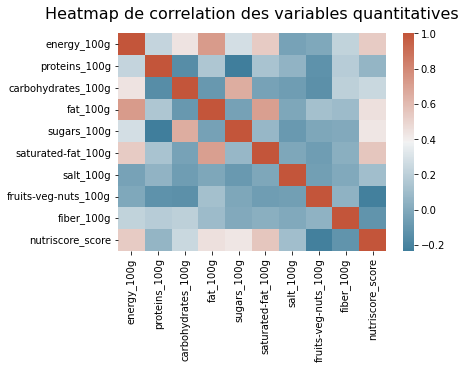

In [162]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_s7.select_dtypes(include=['float64']).corr(), cmap = cmap);
plt.title("Heatmap de correlation des variables quantitatives", size = 16, y=1.04);

In [163]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [164]:
#imputer = IterativeImputer(n_nearest_features=2, random_state=0)
#data_fit = imputer.fit_transform(data_s7.select_dtypes(include=['float64']))
#data_fit = pd.DataFrame(data_fit, columns = data_s7.select_dtypes(include=['float64']).columns)
#data_s7.reset_index(inplace=True, drop=True)

En réalisant cet IterativeImputer, j'obtenais dans le notebook d'analyse des distributions de densités pour les varaibles 'salt_100g', 'fruits-veg-nuts_100g' et 'fiber_100g' qui ne correspondaient pas à ce qui était attendu. Ces trois variables ne sont pas assez corrélées pour être complétées par IterativeImputer. 

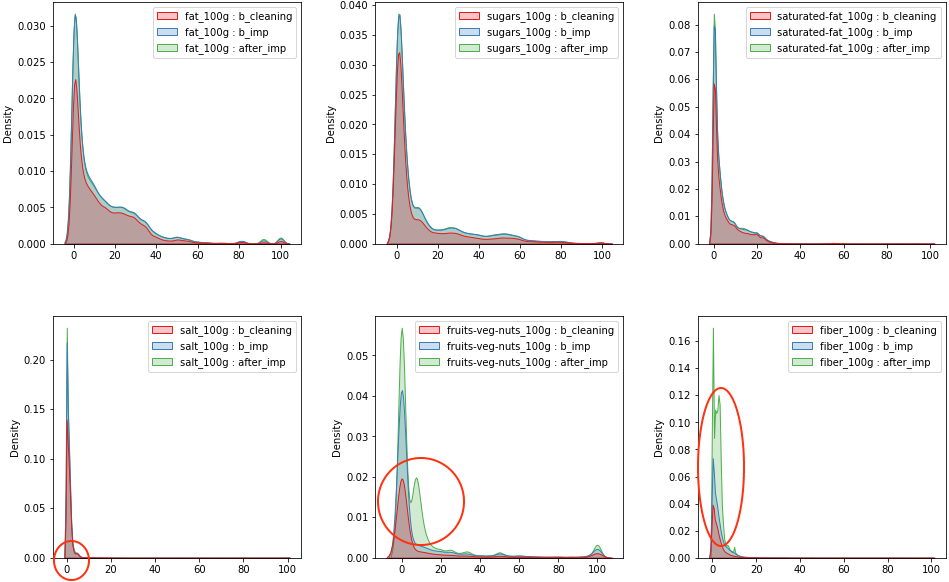

Je décide donc de compléter par des zeros les valeurs manquantes de ces trois colonnes.

In [165]:
data_s7['salt_100g'].fillna(value=0, inplace=True)

In [166]:
data_s7['fruits-veg-nuts_100g'].fillna(value=0, inplace=True)

In [167]:
data_s7['fiber_100g'].fillna(value=0, inplace=True)

In [168]:
data_s7.isna().sum()

code                         0
countries                 2670
categories              820406
energy_100g               3314
proteins_100g             2699
carbohydrates_100g        5382
fat_100g                  5001
sugars_100g              26662
saturated-fat_100g       32397
salt_100g                    0
fruits-veg-nuts_100g         0
fiber_100g                   0
nutriscore_score        856455
nutriscore_grade        905297
dtype: int64

In [169]:
#Je garde une copie de ce dataset afin de l'utiliser avec KNNImputer par la suite.
data_s7b = data_s7.copy()

In [170]:
imputer = IterativeImputer(n_nearest_features=5, random_state=0, max_iter=100)
data_fit = imputer.fit_transform(data_s7.select_dtypes(include=['float64']))

C:\Users\Simon\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [171]:
data_fit = pd.DataFrame(data_fit, columns = data_s7.select_dtypes(include=['float64']).columns)

In [172]:
data_fit

energy_100g  proteins_100g  carbohydrates_100g  fat_100g  \
0              690.0            1.5                65.0       2.0   
1             1569.0            7.8                70.1       7.0   
2              812.0           18.0                 5.7      11.0   
3             3661.0           15.7                 2.6      15.1   
4              936.0            5.1                29.0       8.2   
...              ...            ...                 ...       ...   
1529568       1456.0           24.2                58.4       1.1   
1529569       1393.0            7.4                30.9      20.2   
1529570        418.0            1.0                 2.0      12.0   
1529571        100.0            1.6                 2.4       0.3   
1529572        100.0            2.0                70.0      28.0   

         sugars_100g  saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  \
0              12.60                2.00       0.00                   0.0   
1              15.00                3.08       1.40                   0.0   
2               0.05                3.90       0.00                   0.0   
3               1.00                6.10       2.10                   0.0   
4              22.00                2.20       4.60                   0.0   
...              ...                 ...        ...                   ...   
1529568         0.00                0.00       0.00                   0.0   
1529569        10.40                6.00       1.10                   0.0   
1529570         1.00                1.00       1.00                   0.0   
1529571         0.60                0.00       0.64                   0.0   
1529572        49.00               13.00       3.00                   0.0   

         fiber_100g  nutriscore_score  
0               3.0          4.875440  
1               0.0          8.188518  
2               0.0          6.061910  
3               0.0         15.982299  
4               0.0         18.000000  
...             ...               ...  
1529568        10.5          4.286142  
1529569         0.0         15.000000  
1529570         0.0          3.982550  
1529571         0.0          2.671167  
1529572         6.0         25.000000  

[1529573 rows x 10 columns]

In [173]:
data_s7.reset_index(inplace=True, drop=True)

In [174]:
data_s7

code    countries       categories  energy_100g  \
0        0000000000000207025004    Allemagne              NaN        690.0   
1                 0000000000017       France              NaN       1569.0   
2            000000000004128579      Espagne              NaN        812.0   
3            000000000004622327      Espagne              NaN       3661.0   
4                 0000000000100       France        Moutardes        936.0   
...                         ...          ...              ...          ...   
1529568           9999999000041       Italie              NaN       1456.0   
1529569           9999999004360       France  Beignets sucrés       1393.0   
1529570              9999999901  Royaume-Uni              NaN        418.0   
1529571           9999999990397     Belgique              NaN        100.0   
1529572           9999999999994       France  Desserts lactés        100.0   

         proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
0                  1.5                65.0       2.0        12.60   
1                  7.8                70.1       7.0        15.00   
2                 18.0                 5.7      11.0         0.05   
3                 15.7                 2.6      15.1         1.00   
4                  5.1                29.0       8.2        22.00   
...                ...                 ...       ...          ...   
1529568           24.2                58.4       1.1         0.00   
1529569            7.4                30.9      20.2        10.40   
1529570            1.0                 2.0      12.0         1.00   
1529571            1.6                 2.4       0.3         0.60   
1529572            2.0                70.0      28.0        49.00   

         saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  \
0                      2.00       0.00                   0.0         3.0   
1                      3.08       1.40                   0.0         0.0   
2                      3.90       0.00                   0.0         0.0   
3                      6.10       2.10                   0.0         0.0   
4                      2.20       4.60                   0.0         0.0   
...                     ...        ...                   ...         ...   
1529568                0.00       0.00                   0.0        10.5   
1529569                6.00       1.10                   0.0         0.0   
1529570                1.00       1.00                   0.0         0.0   
1529571                0.00       0.64                   0.0         0.0   
1529572               13.00       3.00                   0.0         6.0   

         nutriscore_score nutriscore_grade  
0                     NaN              NaN  
1                     NaN              NaN  
2                     NaN              NaN  
3                     NaN              NaN  
4                    18.0                d  
...                   ...              ...  
1529568               NaN              NaN  
1529569              15.0                d  
1529570               NaN              NaN  
1529571               NaN              NaN  
1529572              25.0                e  

[1529573 rows x 14 columns]

In [175]:
data_cleaned = data_s7[['code','countries', 'categories', 'nutriscore_grade']].join(data_fit)

In [176]:
mask = (data_cleaned.select_dtypes(include=['float64']) < 0)
data_cleaned.select_dtypes(include=['float64']).where(~mask, other = np.nan, inplace = True)

In [177]:
data_numeric = data_cleaned.select_dtypes(include=['float64'])
data_numeric.drop(['energy_100g'], axis = 1, inplace = True)
mask = (data_numeric.loc[:,data_numeric.columns]>100)
data_numeric.where(~mask, other = np.nan, inplace = True)
data_cleaned.loc[:,'proteins_100g':'fiber_100g'] = data_numeric

In [178]:
data_cleaned.head()

code  countries categories nutriscore_grade  energy_100g  \
0  0000000000000207025004  Allemagne        NaN              NaN        690.0   
1           0000000000017     France        NaN              NaN       1569.0   
2      000000000004128579    Espagne        NaN              NaN        812.0   
3      000000000004622327    Espagne        NaN              NaN       3661.0   
4           0000000000100     France  Moutardes                d        936.0   

   proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
0            1.5                65.0       2.0        12.60   
1            7.8                70.1       7.0        15.00   
2           18.0                 5.7      11.0         0.05   
3           15.7                 2.6      15.1         1.00   
4            5.1                29.0       8.2        22.00   

   saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  \
0                2.00        0.0                   0.0         3.0   
1                3.08        1.4                   0.0         0.0   
2                3.90        0.0                   0.0         0.0   
3                6.10        2.1                   0.0         0.0   
4                2.20        4.6                   0.0         0.0   

   nutriscore_score  
0          4.875440  
1          8.188518  
2          6.061910  
3         15.982299  
4         18.000000

In [179]:
print ("Le dataset compte {} lignes et {} colonnes.".format(data_cleaned.shape[0], data_cleaned.shape[1]))

Le dataset compte 1529573 lignes et 14 colonnes.


In [180]:
print('Données manquantes (%) : ', data_cleaned.isna().sum().sum()/(data_cleaned.shape[0]*data_cleaned.shape[1])*100)

Données manquantes (%) :  8.58501499624872


J'essaie aussi avec KNNImputer.

In [181]:
data_s7knn = data_s7b[:50000]

In [182]:
data_s7knn.head()

code  countries categories  energy_100g  proteins_100g  \
1   0000000000000207025004  Allemagne        NaN        690.0            1.5   
4            0000000000017     France        NaN       1569.0            7.8   
7       000000000004128579    Espagne        NaN        812.0           18.0   
8       000000000004622327    Espagne        NaN       3661.0           15.7   
10           0000000000100     France  Moutardes        936.0            5.1   

    carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
1                 65.0       2.0        12.60                2.00        0.0   
4                 70.1       7.0        15.00                3.08        1.4   
7                  5.7      11.0         0.05                3.90        0.0   
8                  2.6      15.1         1.00                6.10        2.1   
10                29.0       8.2        22.00                2.20        4.6   

    fruits-veg-nuts_100g  fiber_100g  nutriscore_score nutriscore_grade  
1                    0.0         3.0               NaN              NaN  
4                    0.0         0.0               NaN              NaN  
7                    0.0         0.0               NaN              NaN  
8                    0.0         0.0               NaN              NaN  
10                   0.0         0.0              18.0                d

In [183]:
data_s7knn_num = data_s7knn.select_dtypes(include=['float64'])

In [184]:
from sklearn.impute import KNNImputer

In [185]:
imputer = KNNImputer(n_neighbors = 2, weights = 'uniform')
data_fit_knn = imputer.fit_transform(data_s7knn_num)
data_fit_knn = pd.DataFrame(data_fit_knn, columns = data_s7knn_num.columns)
data_s7b.reset_index(inplace=True, drop=True)
data_cleaned_knn = data_s7knn[['code','countries', 'categories']].join(data_fit_knn)
print ("Le dataset compte {} lignes et {} colonnes.".format(data_cleaned_knn.shape[0], data_cleaned_knn.shape[1]))
print('Données manquantes (%) : ', data_cleaned_knn.isna().sum().sum()/(data_cleaned_knn.shape[0]*data_cleaned_knn.shape[1])*100)

Le dataset compte 50000 lignes et 13 colonnes.
Données manquantes (%) :  27.160769230769233


In [186]:
df_compared = (data_cleaned_knn[:50000].select_dtypes(include=['float64'])-data_cleaned[:50000].select_dtypes(include=['float64']))/(data_cleaned_knn[:50000].select_dtypes(include=['float64'])+data_cleaned[:50000].select_dtypes(include=['float64']))

In [187]:
df_compared.head()

energy_100g  proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  \
0          NaN            NaN                 NaN       NaN          NaN   
1          0.0            0.0                 0.0       0.0          0.0   
2          NaN            NaN                 NaN       NaN          NaN   
3          NaN            NaN                 NaN       NaN          NaN   
4          0.0            0.0                 0.0       0.0          0.0   

   saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  fiber_100g  \
0                 NaN        NaN                   NaN         NaN   
1                 0.0        0.0                   NaN         NaN   
2                 NaN        NaN                   NaN         NaN   
3                 NaN        NaN                   NaN         NaN   
4                 0.0        0.0                   NaN         NaN   

   nutriscore_score  
0               NaN  
1          0.188795  
2               NaN  
3               NaN  
4          0.000000

Je constate que les imputations par IterativeImputer et KNNImputer sont semblables (mean, Q1 et Q3 proches).

In [188]:
df_compared.describe()

energy_100g  proteins_100g  carbohydrates_100g      fat_100g  \
count  32552.000000   26102.000000        30740.000000  24456.000000   
mean      -0.000112      -0.000525           -0.000604     -0.001156   
std        0.010365       0.026897            0.025313      0.034963   
min       -1.000000      -1.000000           -1.000000     -1.000000   
25%        0.000000       0.000000            0.000000      0.000000   
50%        0.000000       0.000000            0.000000      0.000000   
75%        0.000000       0.000000            0.000000      0.000000   
max        0.304139       0.710106            0.754954      0.979164   

        sugars_100g  saturated-fat_100g  salt_100g  fruits-veg-nuts_100g  \
count  27020.000000        20977.000000    27771.0                4443.0   
mean      -0.006183           -0.024355        0.0                   0.0   
std        0.085065            0.153182        0.0                   0.0   
min       -1.000000           -1.000000        0.0                   0.0   
25%        0.000000            0.000000        0.0                   0.0   
50%        0.000000            0.000000        0.0                   0.0   
75%        0.000000            0.000000        0.0                   0.0   
max        0.769222            0.981401        0.0                   0.0   

       fiber_100g  nutriscore_score  
count     16577.0      29314.000000  
mean          0.0         -0.014741  
std           0.0         25.244036  
min           0.0       -516.173926  
25%           0.0          0.000000  
50%           0.0          0.000000  
75%           0.0          0.000000  
max           0.0       3283.829869

In [189]:
# Je calcule les nutrisgrades à partir des nutriscores imputés. 
def calc_nutriscore(row):
    if row["nutriscore_score"] < 0 :
        nutriscore = "a"
    elif ((row["nutriscore_score"] >= 0) & (row["nutriscore_score"] < 5)) :
        nutriscore = "b"
    elif ((row["nutriscore_score"] >= 5) & (row["nutriscore_score"] < 10)) :
        nutriscore = "c"
    elif ((row["nutriscore_score"] >= 10) & (row["nutriscore_score"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"
        
    return nutriscore

In [190]:
data_cleaned['calc_nutriscore'] = data_cleaned.apply(lambda row: calc_nutriscore(row),axis=1)

In [191]:
data_cleaned['nutriscore'] = data_cleaned['nutriscore_grade'].fillna(data_cleaned['calc_nutriscore'])

In [192]:
data_cleaned['nutriscore'] = data_cleaned['nutriscore'].str.upper()

In [193]:
data_cleaned.drop(['nutriscore_grade', 'calc_nutriscore', 'nutriscore_score'], axis = 1, inplace = True)

In [194]:
data_cleaned.head()

code  countries categories  energy_100g  proteins_100g  \
0  0000000000000207025004  Allemagne        NaN        690.0            1.5   
1           0000000000017     France        NaN       1569.0            7.8   
2      000000000004128579    Espagne        NaN        812.0           18.0   
3      000000000004622327    Espagne        NaN       3661.0           15.7   
4           0000000000100     France  Moutardes        936.0            5.1   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                65.0       2.0        12.60                2.00        0.0   
1                70.1       7.0        15.00                3.08        1.4   
2                 5.7      11.0         0.05                3.90        0.0   
3                 2.6      15.1         1.00                6.10        2.1   
4                29.0       8.2        22.00                2.20        4.6   

   fruits-veg-nuts_100g  fiber_100g nutriscore  
0                   0.0         3.0          B  
1                   0.0         0.0          C  
2                   0.0         0.0          C  
3                   0.0         0.0          D  
4                   0.0         0.0          D

## <font color="#114b98" id="section_8">8. Préparation à l'analyse exploratoire</font>

In [195]:
data_cleaned.isna().sum()

code                         0
countries                 2670
categories              820406
energy_100g                  1
proteins_100g              145
carbohydrates_100g          69
fat_100g                  1683
sugars_100g               3824
saturated-fat_100g        2747
salt_100g                    0
fruits-veg-nuts_100g         0
fiber_100g                   0
nutriscore                   0
dtype: int64

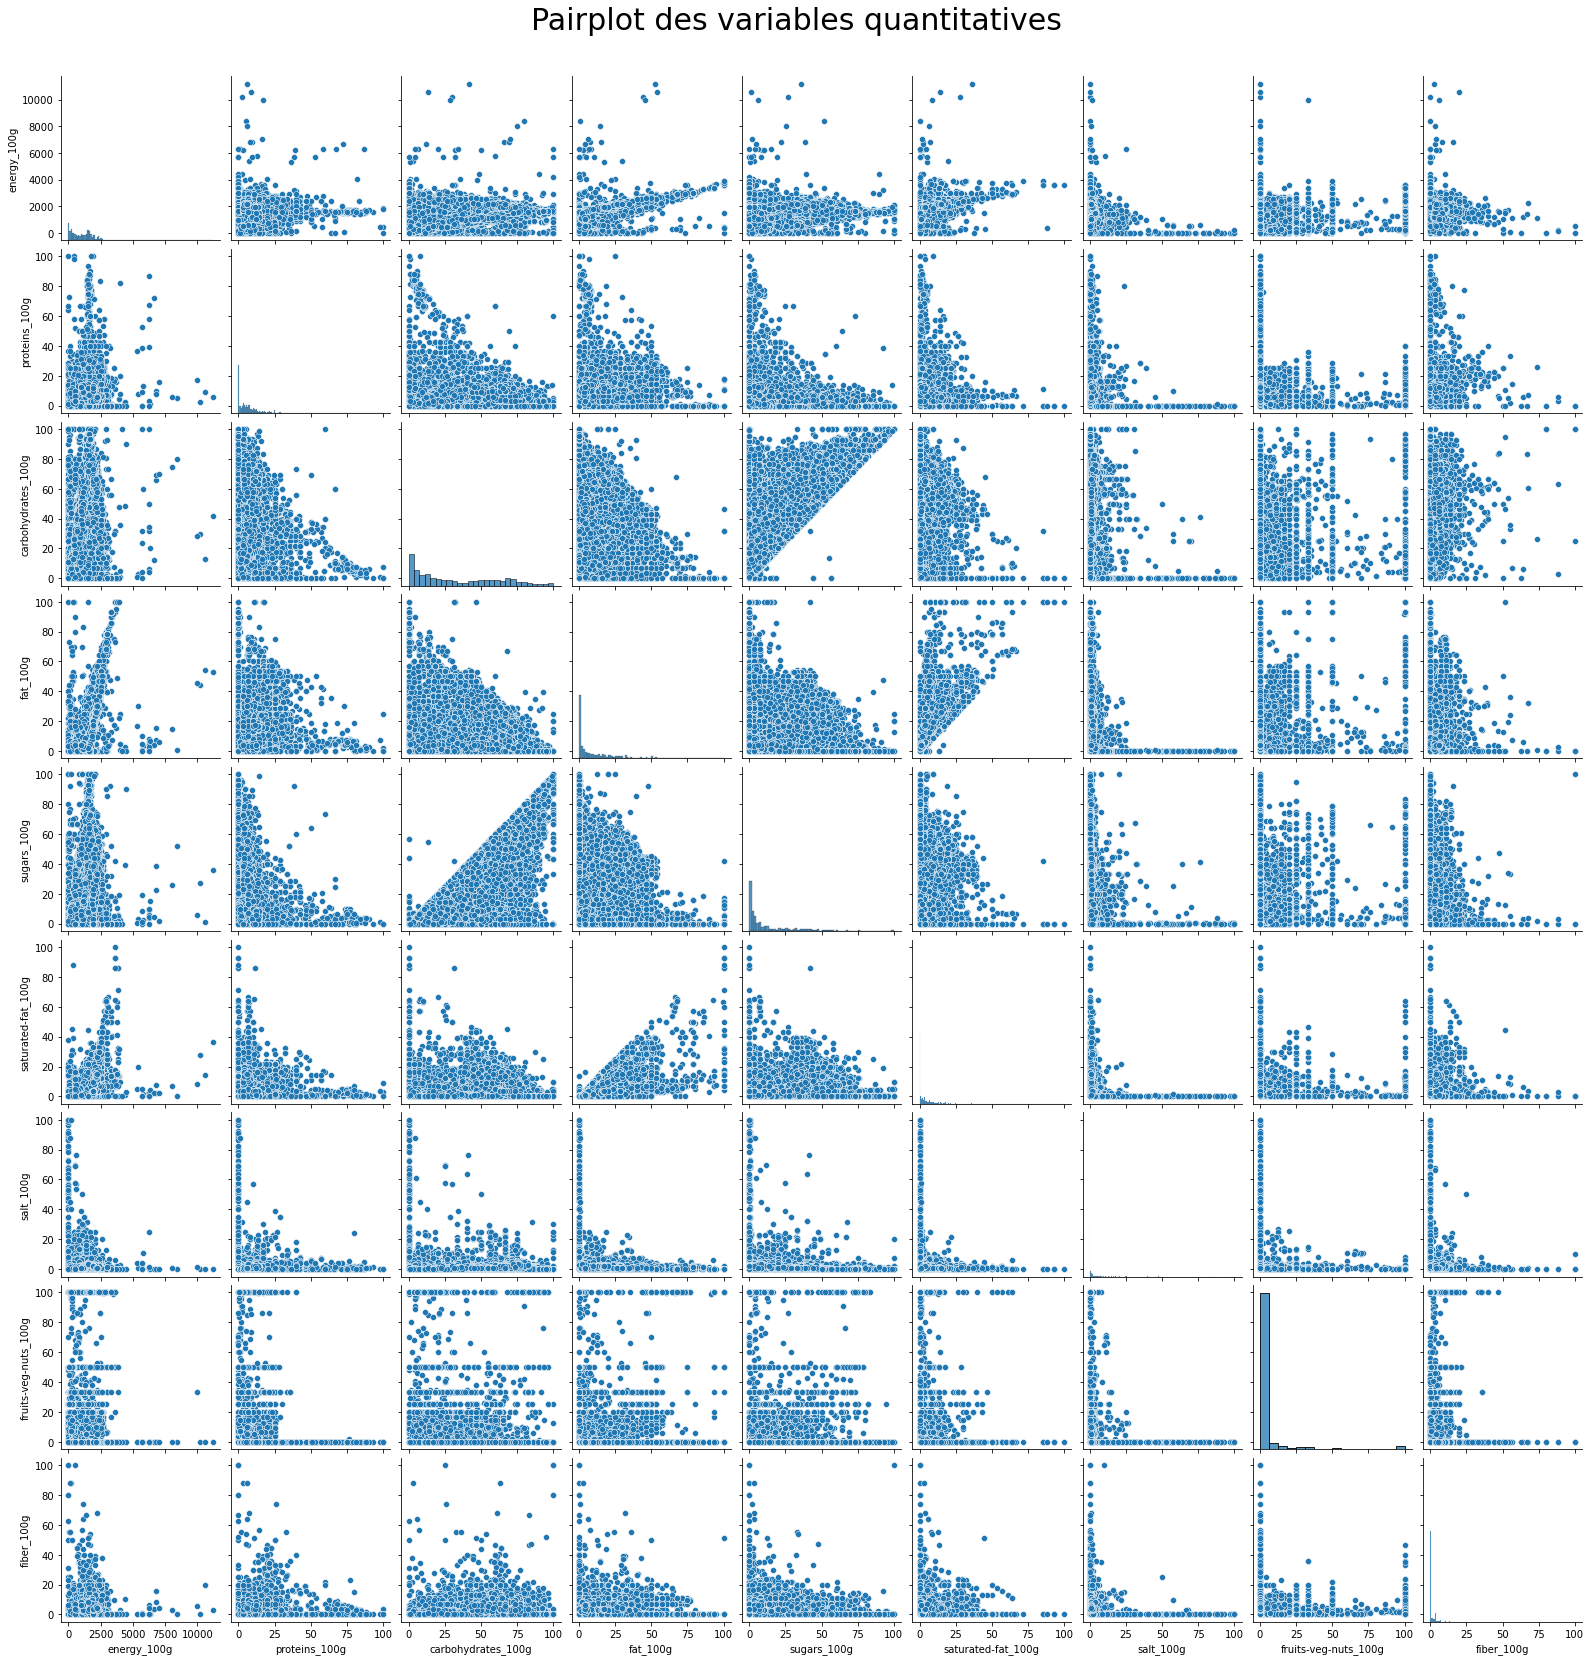

In [196]:
data_cleaned_pairplot = data_cleaned[:20000]
g = sns.pairplot(data_cleaned_pairplot)
g.fig.suptitle("Pairplot des variables quantitatives", y=1.03, size = 30);

Je sélectionne uniquement les produits vendus en France.

In [197]:
data_cleaned = data_cleaned[data_cleaned['countries']=='France']
data_cleaned = data_cleaned.drop('countries', axis = 1)

In [198]:
data_cleaned.shape

(556360, 12)

J'enlève les produits sans code barres qui commencent par 200.
Ces codes barres ont été affectés au produits qui n'en possédaient pas. Ils ne pourront donc être scannés.

In [199]:
data_cleaned['code'].str.startswith('200').sum()

5023

In [200]:
data_cleaned = data_cleaned[~(data_cleaned['code'].str.startswith('200'))]

In [201]:
data_cleaned['code'].str.startswith('200').sum()

0

In [202]:
data_cleaned.shape

(551337, 12)

Je décide de supprimer toutes les données manquantes de 'categories' car il ne m'est pas possible de les imputer : des aliments peuvent avoir des valeurs semblables dans les autres paramètres en étant totalement différents, c'est d'ailleurs l'objectif de cette application.

In [203]:
data_cleaned.isna().sum()

code                         0
categories              270497
energy_100g                  1
proteins_100g               41
carbohydrates_100g          33
fat_100g                   448
sugars_100g                477
saturated-fat_100g         489
salt_100g                    0
fruits-veg-nuts_100g         0
fiber_100g                   0
nutriscore                   0
dtype: int64

In [204]:
data_cleaned = data_cleaned[~(data_cleaned['categories'].isnull())]

In [205]:
data_cleaned.reset_index(inplace = True, drop = True)

In [206]:
data_cleaned.head()

code                categories  energy_100g  proteins_100g  \
0  0000000000100                 Moutardes        936.0            5.1   
1  0000000001281  Tartes à la noix de coco       1594.0            4.6   
2  0000000001885         Compotes de poire        657.0            0.6   
3  0000000002257     Macédoines de légumes        598.0            1.9   
4  0000000005166         Cuisses de poulet        824.0           17.0   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0                29.0       8.2         22.0                 2.2       4.60   
1                27.3      22.0         21.9                15.5       0.10   
2                36.0       0.0         27.0                 0.0       0.00   
3                 3.9      12.7          1.0                 1.0       0.27   
4                 3.0      13.0          0.9                 4.0       1.10   

   fruits-veg-nuts_100g  fiber_100g nutriscore  
0                   0.0         0.0          D  
1                   0.0         4.4          D  
2                   0.0         3.6          A  
3                   0.0         0.0          B  
4                   0.0         0.0          C

In [207]:
(data_cleaned['categories'].value_counts().values==1).sum()

6907

In [208]:
#data_cleaned['categories'].value_counts()[data_cleaned['categories'].value_counts().values==1].tail(50)

Je crée maintenant une nouvelle variable 'régime' dans mon dataset qui prendra deux valeurs possibles :
 - 'viandes_poissons'
 - 'autres_produits'

J'affecte pour le moment 'autres_produits' à toutes les observations.

In [209]:
data_cleaned['régime'] = 'autres_produits'

Je vais affecter 'viandes_poissons' aux observations composées de viandes ou de poissons. 

In [210]:
data_cleaned['categories'].value_counts().index.to_list()

['Boissons avec sucre ajouté',
 'Boissons',
 'Biscuits',
 'Chocolats noirs',
 'Bonbons',
 'Fromages',
 'Boissons sans sucre ajouté',
 'Jambons blancs',
 "Huiles d'olive vierges extra",
 'Sauces',
 'Biscuits apéritifs',
 'Chocolats au lait',
 'Céréales pour petit déjeuner',
 'Poisson',
 'Moutardes',
 'Plats préparés à réchauffer au micro ondes',
 'Confitures de fraises',
 'Biscuits au chocolat',
 'Jambon',
 'Bonbons de chocolat',
 'Yaourts',
 'Matières grasses',
 'Madeleines',
 'Filets de poulet',
 'Confiseries',
 'Pâtes alimentaires',
 'Saumons fumés',
 "Chips de pommes de terre à l'huile de tournesol",
 'Gâteaux',
 "Pains d'épices",
 'Biscuits sablés',
 'Saucissons secs',
 'Protéines en poudre',
 'Pains',
 "Confitures d'abricot",
 'Mayonnaises',
 'Pâtes à tartiner aux noisettes et au cacao',
 'Mueslis',
 'Panettone',
 'Chocolats',
 "Jus d'orange pur jus",
 'Snacks',
 'Chipolatas',
 'Glaces',
 'Barres protéinées',
 'Mueslis aux fruits',
 'Plats préparés surgelés',
 'Rôtis de porc',
 'S

Je regarde dans cette liste les produits qui sont issus de la viande animale ou de poissons.

'Jambons blancs', 'Poisson', 'Jambon', 'Filets de poulet', 'Saumons fumés', 'Viande', 'Saucissons secs', 'Chipolatas', 'Rôtis de porc', 'Foies gras de canard entiers', 'Plats préparés surgelés','Plats au poulet','Terrines de campagne', 'Pâtés de campagne','Plats préparés', 'Plats préparés à réchauffer au micro ondes', 'Charcuteries', "Saumons fumés d'élevage",'Terrines de canard', 'Cuisses de poulet',"Sardines à l'huile d'olive",'Boudin noir sauté','Plats préparés réfrigérés','Bloc de foie gras','Surgelés','Filets de maquereaux','Saucisses','Poulets','Rillettes de canard','Truites fumées','Chorizo','Steaks de bœuf hachés','Saucissons secs pur porc','Jambons secs','Escalopes de dinde','Magrets de canard',"Filets d'anchois marinés à l'huile végétale",'Lardons de porc fumés','Blancs de poulet en tranches','Pâté en croûte','Maquereaux en conserve','Foies gras entiers', 'Rosettes','Aiguillettes de poulet','Saucisses de volaille','Plats préparés en conserve','Produits labellises', 'Crevettes tous','Nuggets de poulet','Thons au naturel','Cassoulets','Lasagnes à la bolognaise','Pavés de saumon','Charcuteries cuites', 'Paëllas','Terrines','Sauces bolognaises','Saucissons','Hachis parmentier','Foies gras de canard','Croque monsieur', 'Poissons','Merguez','Poitrine de porc','Viandes','Saucisses sèches','Plats préparés au poisson','Saucisses de Toulouse', 'Porc','Filets de harengs','Jambons cuits a l ancienne','Steaks hachés de bœuf frais','Jambons',"Saucissons à l'ail", 'Choucroutes garnies','Jambons blancs à teneur réduite en sel','Sardines à la tomate','Filets de cabillaud','Steaks hachés de bœuf surgelés','Rillettes de porc','Foies gras mi cuits','Cassoulets au confit de canard','Saucisses cocktail','Côtes de porc', "Thons à l'huile de tournesol",'Gésiers de canard','Ravioli','Dindes', 'Ravioli en conserve','Manchons de poulet','Bœuf','Nems au poulet','Salamis','Saucisses de Strasbourg','Saumons fumés sauvages', 'Charcuteries à cuire', 'Cordons bleus de dinde', 'Viande de lapin', 'Rillettes de poulet', 'Sandwichs', 'Wraps', 'Thons blancs', 'Pâtes farcies', "Sardines à l'huile de tournesol", 'Filets de saumon', 'Raviolis au bœuf', "Thons à l'huile d'olive", 'Bloc de foie gras avec morceaux', 'Filets de colin', 'Escalopes de poulet', 'Nems au porc', 'Pâtés de foie', 'Pizza jambon fromage', 'Plats préparés à la viande', 'Viande de bœuf séchée', 'Viande de bœuf séchée', 'Terrines de lapin', 'Thons', 'Knacks industrielles', 'Escargots de Bourgogne', 'Cordons bleus', 'Saucisses aux lentilles', 'Poissons surgelés', 'Gratins dauphinois', 'Poulets au curry', 'Surimi', 'Blanquettes de veau', 'Poissons panés de merlu blanc', 'Filets de thon', 'Chili con carne', 'Filets de canard', 'Terrines de sanglier', 'Poissons en conserve', 'Rillettes du Mans','Batonnets de poisson', "Souris d'agneau", "Sardines à l'huile et au citron", 'Sandwichs Jambon Fromage', 'Tripes', 'Volailles', 'Crevettes décortiquées', 'Saumons', 'Mousses de foies', 'Andouilles de Guémené', 'Saucisses fumées', 'Confits de canard', 'Nems', 'Charcuteries diverses', 'Mousses de canard', 'Chipolatas aux herbes', 'Blancs de dinde en tranches', 'Poissons panés', 'Cordons bleus de poulet', 'Viande des grisons', 'Chorizo doux', 'Salades piémontaises au jambon', 'Bouillons cubes', 'Thons albacore', 'Lardons de porc', 'Bœufs bourguignons', 'Mortadelle', 'Rillettes de poissons', 'Escalopes de dinde à la milanaise', 'Ravioles', 'Blancs de volaille en tranches', 'Hamburgers', 'Quenelles de brochet', 'Quenelles nature', 'Saucisses de Morteau', 'Saumons sauvages', 'Rillettes de thon', "Sardines à l'huile",'Ailes de poulet','Cuisses de canard','Queues de crevettes','Filets de poulet rotis', 'Petits salés aux lentilles', 'Plats au bœuf', 'Foies de morue', 'Terrines de saumon', "Moules à l'escabèche", 'Dés de jambon', 'Boudins blancs', 'Andouillettes de Troyes', 'Jambonneau', 'Poulets basquaise', 'Saucisses de Francfort', "Sardines à l'huile et au piment", 'Saucisses de poulet',  'Bouillons de bœuf', 'Plats au porc', 'Moules', 'Blancs de dinde', 'Parmentiers de canard', 'Taramas au cabillaud', 'Cheeseburgers',  'Calamars','Traiteur','Feuilleté salé', 'Bacon fumé', 'Plats repas prepares', 'Thons albacore au naturel', 'Rillettes de Saint Jacques', 'Ravioli à la crevette', 'Terrine campagnarde', 'Thons en conserve', 'Anchoïade', 'Plats prepares a rechauffer au bain marie', 'Jambons blancs fumés'

Ici je n'ai pas parcourru l'intégralité de la liste mais uniquement les produits de la même catégorie ayant plus de 50 observations.

In [211]:
list_meat_fish = ['Jambons blancs', 'Poisson', 'Jambon', 'Filets de poulet', 'Saumons fumés', 'Viande', 'Saucissons secs', 
                'Chipolatas', 'Rôtis de porc', 'Foies gras de canard entiers', 'Plats préparés surgelés','Plats au poulet',
                'Terrines de campagne', 'Pâtés de campagne','Plats préparés', 'Plats préparés à réchauffer au micro ondes', 
                'Charcuteries', "Saumons fumés d'élevage",'Terrines de canard', 'Cuisses de poulet','Bloc de foie gras',
                "Sardines à l'huile d'olive",'Boudin noir sauté','Plats préparés réfrigérés','Surgelés','Filets de maquereaux',
                'Saucisses','Poulets','Rillettes de canard','Truites fumées','Chorizo','Steaks de bœuf hachés','Jambons secs',
                'Saucissons secs pur porc','Escalopes de dinde', "Filets d'anchois marinés à l'huile végétale",
                'Lardons de porc fumés','Blancs de poulet en tranches','Magrets de canard','Pâté en croûte',
                'Maquereaux en conserve','Foies gras entiers', 'Rosettes','Aiguillettes de poulet','Saucisses de volaille',
                'Plats préparés en conserve','Produits labellises', 'Crevettes tous','Nuggets de poulet','Thons au naturel',
                'Cassoulets','Lasagnes à la bolognaise','Pavés de saumon','Charcuteries cuites', 'Paëllas','Terrines',
                'Sauces bolognaises','Saucissons','Hachis parmentier','Foies gras de canard','Croque monsieur', 'Poissons',
                'Merguez','Poitrine de porc','Viandes','Saucisses sèches','Plats préparés au poisson','Saucisses de Toulouse',
                'Porc','Filets de harengs','Jambons cuits a l ancienne','Steaks hachés de bœuf frais','Jambons',
                "Saucissons à l'ail", 'Choucroutes garnies','Jambons blancs à teneur réduite en sel','Sardines à la tomate',
                'Filets de cabillaud','Steaks hachés de bœuf surgelés','Rillettes de porc','Foies gras mi cuits',
                'Cassoulets au confit de canard','Saucisses cocktail','Côtes de porc', "Thons à l'huile de tournesol",
                'Gésiers de canard','Ravioli','Dindes', 'Ravioli en conserve','Manchons de poulet','Bœuf','Nems au poulet',
                'Salamis','Saucisses de Strasbourg','Saumons fumés sauvages', 'Charcuteries à cuire', 'Cordons bleus de dinde',
                'Viande de lapin', 'Rillettes de poulet', 'Sandwichs', 'Wraps', 'Thons blancs', 'Pâtes farcies',
                "Sardines à l'huile de tournesol", 'Filets de saumon', 'Raviolis au bœuf', "Thons à l'huile d'olive",
                'Bloc de foie gras avec morceaux', 'Filets de colin', 'Escalopes de poulet', 'Nems au porc', 'Pâtés de foie',
                'Pizza jambon fromage', 'Plats préparés à la viande', 'Viande de bœuf séchée', 'Viande de bœuf séchée',
                'Terrines de lapin', 'Thons', 'Knacks industrielles', 'Escargots de Bourgogne', 'Cordons bleus', 
                'Saucisses aux lentilles', 'Poissons surgelés', 'Gratins dauphinois', 'Poulets au curry', 'Surimi', 
                'Blanquettes de veau', 'Poissons panés de merlu blanc', 'Filets de thon', 'Chili con carne', 
                'Filets de canard', 'Terrines de sanglier', 'Poissons en conserve', 'Rillettes du Mans',
                'Batonnets de poisson', "Souris d'agneau", "Sardines à l'huile et au citron", 'Sandwichs Jambon Fromage', 
                'Tripes', 'Volailles', 'Crevettes décortiquées', 'Saumons', 'Mousses de foies', 'Andouilles de Guémené', 
                'Saucisses fumées', 'Confits de canard', 'Nems', 'Charcuteries diverses', 'Mousses de canard', 
                'Chipolatas aux herbes', 'Blancs de dinde en tranches', 'Poissons panés', 'Cordons bleus de poulet', 
                'Viande des grisons', 'Chorizo doux', 'Salades piémontaises au jambon', 'Bouillons cubes', 'Thons albacore',
                'Lardons de porc', 'Bœufs bourguignons', 'Mortadelle', 'Rillettes de poissons', 
                'Escalopes de dinde à la milanaise', 'Ravioles', 'Blancs de volaille en tranches', 'Hamburgers', 
                'Quenelles de brochet', 'Quenelles nature', 'Saucisses de Morteau', 'Saumons sauvages', 'Rillettes de thon',
                "Sardines à l'huile",'Ailes de poulet','Cuisses de canard','Queues de crevettes','Filets de poulet rotis', 
                'Petits salés aux lentilles', 'Plats au bœuf', 'Foies de morue', 'Terrines de saumon', "Moules à l'escabèche",
                'Dés de jambon', 'Boudins blancs', 'Andouillettes de Troyes', 'Jambonneau', 'Poulets basquaise', 
                'Saucisses de Francfort', "Sardines à l'huile et au piment", 'Saucisses de poulet',  'Bouillons de bœuf', 
                'Plats au porc', 'Moules', 'Blancs de dinde', 'Parmentiers de canard', 'Taramas au cabillaud', 'Cheeseburgers',
                'Calamars','Traiteur','Feuilleté salé', 'Bacon fumé', 'Plats repas prepares', 'Thons albacore au naturel',
                'Rillettes de Saint Jacques', 'Ravioli à la crevette', 'Terrine campagnarde', 'Thons en conserve', 'Anchoïade',
                'Plats prepares a rechauffer au bain marie', 'Jambons blancs fumés', 'Mollusques', 'Produits de la mer', 
                'sardines', 'Abats', 'Cerf', 'cerf', 'Kangourou', 'Rotis', 'Alouettes', 'Bulot', 'Rosette', 'Chiffonnade', 
                'charcuterie', 'Saucisson', 'Charcut', 'Sardine', 'truite', 'truites', 'filets', 'Chapons', 'Cordon', 'egg', 
                'eggs', 'lorraines', 'Epaules', 'carnés', 'Jmabons', 'Canards', 'Autruche', 'volailles', 'Gambas',
                'Filets', 'bar', 'Coquelets', 'lardons', 'Pintades', 'bacon', 'Tripoux', 'Sangliers', 'hachés', 
                'croûte','campagnarde', 'Coquillages', 'autruche', 'jambons', 'Charcuterie', 'Saucisse', 'nerka', 'Bacons',
                'dindes', 'Bresaola', 'Diots', 'charcutiers', 'Farces', 'Poitrines', 'Galantine', 'Dauphiné', 'Pave',
                'Zèbre', 'Salaison', 'Homards', 'Tourteaux', 'Tortellini', 'kebab', 'Biftecks', 'Truite', 'Lievre', 'crabe',
                'Harengs', 'faisan', 'Rilettes', 'oie']

J'ai ajouté dans la liste ci-dessous toutes les "erreurs" de la dernière partie du notebook d'analyse au fur et à mesure des simulations.

In [212]:
len(list_meat_fish)

281

Je complète la variable 'régime' de toutes les observations qui ont une de ces catégories.

In [213]:
for idx, category in enumerate(data_cleaned['categories']):
    if category in list_meat_fish:
        data_cleaned.iloc[idx,12] = 'viandes_poissons'

Cela a bien complété les observation souhaitées mais de nombreuses observations ne sont pas encore correctement classées.

In [214]:
#Par exemple ici : les lasagnes au saumon, les crêpes au jambon et le foie de veau sont catégoriées en 'autres_produits'
data_cleaned[37:44]

code          categories  energy_100g  proteins_100g  \
37  0000069006562              Rostis        573.0            2.2   
38  0000069013508   Nuggets de poulet        828.0           15.3   
39  0000069028045  Lasagnes au saumon        527.0            6.5   
40  0000069062063    Crêpes au jambon        678.0            8.2   
41  0000069063855        Foie de veau        456.0           17.7   
42  0000069066153    Pommes dauphines       1163.0            5.9   
43  0000069068812      Bûches glacées       1686.0            6.1   

    carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
37                24.0       3.1         0.80                1.60       1.00   
38                17.6       7.2         0.50                1.00       1.80   
39                10.5       6.3         1.50                2.30       0.79   
40                17.0       6.6         3.70                1.70       0.73   
41                 2.0       3.3         0.01                1.20       0.10   
42                24.0      17.0         1.60                7.00       1.50   
43                29.4      28.2        24.30               18.46       0.36   

    fruits-veg-nuts_100g  fiber_100g nutriscore            régime  
37                   0.0         2.2          C   autres_produits  
38                   0.0         1.2          C  viandes_poissons  
39                   0.0         0.0          B   autres_produits  
40                   0.0         0.9          B   autres_produits  
41                   0.0         0.0          A   autres_produits  
42                   0.0         2.7          D   autres_produits  
43                   0.0         0.0          E   autres_produits

Je souhaite aussi créer une nouvelle liste comportant les mots qui apparentent le produit à une viande ou un poisson afin de davantage compléter cette variable 'régime'.

In [215]:
temp = []
for element in list_meat_fish:
    for word in element.split(' '):
        temp.append(word)

In [216]:
elim_list = ['de', 'à', 'au', 'Plats', 'Filets', 'en', "l'huile", 'préparés', 'la', 'réchauffer', 'cuites', 'monsieur',
             'conserve', 'secs', 'aux', 'bleus', 'surgelés', 'mousses', 'panés', 'micro', 'onde', 'tous', 'Croque',
             'lentilles', 'séchée', 'et', 'tournesol', 'Sandwichs', 'a', 'sauvages', 'sauté', 'labellises', 'sèches', 
             'albacore', 'Bouillons', 'naturel', "d'olive", 'prepares', 'entiers', 'réfrigérés', 'Toulouse', 'cuits',
             'Bloc', 'campagne', 'Saint', 'Guémené', 'pur', 'végétale', 'tranches', 'Produits', "l'", 'ancienne','Confits',
             'blancs', "l'ail", 'l', 'mi', 'réduite', 'teneur', 'garnies', 'frais', 'sel', 'ondes', 'noir', 'Surgelés',
             'Blancs', 'rechauffer', 'citron', 'Ravioles', 'Fromage', 'diverses', 'Batonnets', 'cubes', 'doux', 'des', 
             'herbes', 'nature', 'salé', 'bain', 'repas', 'piment', 'Petits', 'salés', 'Dés', 'du', 'Mans', 'Pizza',
             'confit', 'tomate', 'Sauces', 'cocktail', 'blanc', 'curry', 'Bourgogne', 'industrielles', 'fromage',
             'morceaux', 'avec', 'Wraps', 'cuire', 'marie', 'Salades', 'Pâtes','Feuilleté']


In [217]:
item_set = set(word for word in temp if word not in elim_list)

In [218]:
# J'ajoute dans ce set une liste de viandes communes
item_add = ['agneau','Agneau','biche','Biche','boeuf','Boeuf','caille','Caille',
'canard','Canard','cheval','Cheval','chevreuil','Chevreuil','dinde','Dinde',
'lapin','Lapin','mouton','Mouton','pintade','Pintade','porc','Porc','poulet',
'Poulet','sanglier','Sanglier','veau','Veau', 'Saumon']

In [219]:
item_set.update(item_add)

In [220]:
len(item_set)

229

In [221]:
for idx, category in enumerate(data_cleaned['categories']):
    for item in item_set:
        if item in category.split(' '):
            data_cleaned.iloc[idx,12] = 'viandes_poissons'
            break

In [222]:
data_cleaned[37:44]

code          categories  energy_100g  proteins_100g  \
37  0000069006562              Rostis        573.0            2.2   
38  0000069013508   Nuggets de poulet        828.0           15.3   
39  0000069028045  Lasagnes au saumon        527.0            6.5   
40  0000069062063    Crêpes au jambon        678.0            8.2   
41  0000069063855        Foie de veau        456.0           17.7   
42  0000069066153    Pommes dauphines       1163.0            5.9   
43  0000069068812      Bûches glacées       1686.0            6.1   

    carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
37                24.0       3.1         0.80                1.60       1.00   
38                17.6       7.2         0.50                1.00       1.80   
39                10.5       6.3         1.50                2.30       0.79   
40                17.0       6.6         3.70                1.70       0.73   
41                 2.0       3.3         0.01                1.20       0.10   
42                24.0      17.0         1.60                7.00       1.50   
43                29.4      28.2        24.30               18.46       0.36   

    fruits-veg-nuts_100g  fiber_100g nutriscore            régime  
37                   0.0         2.2          C   autres_produits  
38                   0.0         1.2          C  viandes_poissons  
39                   0.0         0.0          B  viandes_poissons  
40                   0.0         0.9          B  viandes_poissons  
41                   0.0         0.0          A  viandes_poissons  
42                   0.0         2.7          D   autres_produits  
43                   0.0         0.0          E   autres_produits

In [223]:
data_cleaned.head(10)

code                      categories  energy_100g  proteins_100g  \
0  0000000000100                       Moutardes        936.0            5.1   
1  0000000001281        Tartes à la noix de coco       1594.0            4.6   
2  0000000001885               Compotes de poire        657.0            0.6   
3  0000000002257           Macédoines de légumes        598.0            1.9   
4  0000000005166               Cuisses de poulet        824.0           17.0   
5  0000000005470                       Baguettes        669.0            9.5   
6   000000001231           Rillettes de sanglier       1360.0           16.0   
7   000000001576           Jus de pommes pur jus        925.0            0.5   
8  0000000020114        Compléments alimentaires          0.0            0.0   
9   000000002946  Pâtes à tartiner aux noisettes         21.0            8.7   

   carbohydrates_100g  fat_100g  sugars_100g  saturated-fat_100g  salt_100g  \
0               29.00       8.2        22.00                 2.2      4.600   
1               27.30      22.0        21.90                15.5      0.100   
2               36.00       0.0        27.00                 0.0      0.000   
3                3.90      12.7         1.00                 1.0      0.270   
4                3.00      13.0         0.90                 4.0      1.100   
5               25.20       2.2         0.60                 0.5      0.358   
6                0.00      29.0         0.00                11.0      1.600   
7                0.01       0.5         0.01                 0.1      0.010   
8                0.00       0.0         0.00                 0.0      0.160   
9               42.80      39.6        12.80                 5.8      0.200   

   fruits-veg-nuts_100g  fiber_100g nutriscore            régime  
0                   0.0       0.000          D   autres_produits  
1                   0.0       4.400          D   autres_produits  
2                   0.0       3.600          A   autres_produits  
3                   0.0       0.000          B   autres_produits  
4                   0.0       0.000          C  viandes_poissons  
5                   0.0       1.600          A   autres_produits  
6                   0.0       0.000          E  viandes_poissons  
7                 100.0       0.100          B   autres_produits  
8                   0.0       0.526          B   autres_produits  
9                   0.0       0.000          B   autres_produits

In [224]:
print('Données manquantes (%) : ', data_cleaned.isna().sum().sum()/(data_cleaned.shape[0]*data_cleaned.shape[1])*100)

Données manquantes (%) :  0.026541255354814674


In [225]:
data_cleaned.dropna(axis = 0, inplace = True)

In [226]:
print('Données manquantes (%) : ', data_cleaned.isna().sum().sum()/(data_cleaned.shape[0]*data_cleaned.shape[1])*100)

Données manquantes (%) :  0.0


In [227]:
print ("Le dataset compte maintenant {} lignes et {} colonnes.".format(data_cleaned.shape[0], data_cleaned.shape[1]))

Le dataset compte maintenant 280035 lignes et 13 colonnes.


Je sauvegarde mon dataset nettoyé afin de l'ouvrir pour la partie analyse.

In [228]:
data_cleaned.to_csv('../1 - Projets/Projet 2/fr.openfoodfacts.org.products_cleaned.csv')